# Postprocessing

Makes control plots and templates.

Authors: Raghav Kansal, Cristina Suarez

In [1]:
import os
from HH4b import utils, plotting, postprocessing
from HH4b.postprocessing import Region, weight_shifts
from HH4b.utils import ShapeVar, CUT_MAX_VAL
from HH4b.hh_vars import data_key, bg_keys, sig_keys, LUMI

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker

from copy import deepcopy

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 16})

In [2]:
# automatically reloads imported files on edits
%load_ext autoreload
%autoreload 2

In [3]:
MAIN_DIR = "../../../"
path_to_dir = f"{MAIN_DIR}/../data/skimmer/23Nov16_v9_privatepfnano/"
year = "2018"

# make plot and template directory
date = "23Nov16_2018"
plot_dir = f"{MAIN_DIR}/plots/PostProcessing/{date}/{year}"
template_dir = f"templates/{date}/"
_ = os.system(f"mkdir -p {plot_dir}")
_ = os.system(f"mkdir -p {template_dir}/cutflows/{year}")

from HH4b.hh_vars import samples
samples = deepcopy(samples[year])
sig_keys = ["hh4b"]
for key in list(samples.keys()):
    if key not in bg_keys + sig_keys + [data_key]:
        del samples[key]

sample_dirs = {path_to_dir: samples}

In [4]:
sample_dirs

{'../../..//../data/skimmer/23Nov16_v9_privatepfnano/': {'hh4b': ['GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8'],
  'qcd': ['QCD_HT-1000to1500-13TeV',
   'QCD_HT-1500to2000-13TeV',
   'QCD_HT-2000toInf-13TeV',
   'QCD_HT-200to300-13TeV',
   'QCD_HT-300to500-13TeV',
   'QCD_HT-500to700-13TeV',
   'QCD_HT-700to1000-13TeV'],
  'data': ['Run2018A', 'Run2018B', 'Run2018C', 'Run2018D'],
  'ttbar': ['TTTo2L2Nu_13TeV', 'TTToHadronic_13TeV', 'TTToSemiLeptonic_13TeV'],
  'vjets': ['WJetsToQQ_HT-200to400_13TeV',
   'WJetsToQQ_HT-400to600_13TeV',
   'WJetsToQQ_HT-600to800_13TeV',
   'WJetsToQQ_HT-800toInf_13TeV',
   'ZJetsToQQ_HT-200to400_13TeV',
   'ZJetsToQQ_HT-400to600_13TeV',
   'ZJetsToQQ_HT-600to800_13TeV',
   'ZJetsToQQ_HT-800toInf_13TeV'],
  'diboson': ['ZZ_TuneCP5_13TeV-pythia8'],
  'gghtobb': ['GluGluHToBB_Pt-200ToInf_M-125_TuneCP5_MINLO_13TeV-powheg-pythia8'],
  'vbfhtobb': ['VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8'],
  'vhtobb': ['WminusH_HToBB_WToQQ_

In [5]:
df = pd.read_parquet("../../../../data/skimmer/23Nov16_v9_privatepfnano/2018/Run2018A/parquet")
list(df.columns)


[('ak4JetEta', 0),
 ('ak4JetEta', 1),
 ('ak4JetEta', 2),
 ('ak4JetEta', 3),
 ('ak4JetEta', 4),
 ('ak4JetEta', 5),
 ('ak4JetPhi', 0),
 ('ak4JetPhi', 1),
 ('ak4JetPhi', 2),
 ('ak4JetPhi', 3),
 ('ak4JetPhi', 4),
 ('ak4JetPhi', 5),
 ('ak4JetMass', 0),
 ('ak4JetMass', 1),
 ('ak4JetMass', 2),
 ('ak4JetMass', 3),
 ('ak4JetMass', 4),
 ('ak4JetMass', 5),
 ('ak4JetPt', 0),
 ('ak4JetPt', 1),
 ('ak4JetPt', 2),
 ('ak4JetPt', 3),
 ('ak4JetPt', 4),
 ('ak4JetPt', 5),
 ('ak8FatJetEta', 0),
 ('ak8FatJetEta', 1),
 ('ak8FatJetPhi', 0),
 ('ak8FatJetPhi', 1),
 ('ak8FatJetMass', 0),
 ('ak8FatJetMass', 1),
 ('ak8FatJetPt', 0),
 ('ak8FatJetPt', 1),
 ('ak8FatJetMsd', 0),
 ('ak8FatJetMsd', 1),
 ('ak8FatJetPNetXbb', 0),
 ('ak8FatJetPNetXbb', 1),
 ('ak8FatJetPNetXjj', 0),
 ('ak8FatJetPNetXjj', 1),
 ('ak8FatJetPNetMass', 0),
 ('ak8FatJetPNetMass', 1),
 ('ak8FatJetTau3OverTau2', 0),
 ('ak8FatJetTau3OverTau2', 1),
 ('ak8FatJetPNetQCDb', 0),
 ('ak8FatJetPNetQCDb', 1),
 ('ak8FatJetPNetQCDbb', 0),
 ('ak8FatJetPNetQCDbb'

In [6]:
filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 300),
        ("('ak8FatJetMsd', '0')", ">=", 50),
        ("('ak8FatJetMsd', '1')", ">=", 50),
        ("('ak8FatJetPNetXbb', '0')", ">=", 0.8),
    ],
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 300),
        ("('ak8FatJetMsd', '0')", ">=", 50),
        ("('ak8FatJetMsd', '1')", ">=", 50),
        ("('ak8FatJetPNetXbb', '1')", ">=", 0.8),
    ],
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 300),
        ("('ak8FatJetPNetMass', '0')", ">=", 50),
        ("('ak8FatJetPNetMass', '1')", ">=", 50),
        ("('ak8FatJetPNetXbb', '0')", ">=", 0.8),
    ],
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 300),
        ("('ak8FatJetPNetMass', '0')", ">=", 50),
        ("('ak8FatJetPNetMass', '1')", ">=", 50),
        ("('ak8FatJetPNetXbb', '1')", ">=", 0.8),
    ],
]

# save cutflow as pandas table
cutflow = pd.DataFrame(index=list(samples.keys()))

# dictionary that will contain all information (from all samples)
events_dict = {}
for input_dir, samples in sample_dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(
            input_dir,
            samples,
            year,
            filters=filters,
        ),
    }

utils.add_to_cutflow(events_dict, "Preselection", "weight", cutflow)
print("\n", cutflow)

Loading GluGlutoHHto4B_cHHH1_TuneCP5_PSWeights_13TeV-powheg-pythia8
Loading QCD_HT-200to300-13TeV
Loading QCD_HT-1000to1500-13TeV
Loading QCD_HT-500to700-13TeV
Loading QCD_HT-700to1000-13TeV
Loading QCD_HT-300to500-13TeV
Loading QCD_HT-1500to2000-13TeV
Loading QCD_HT-2000toInf-13TeV
Loading Run2018A
Loading Run2018C
Loading Run2018D
Loading Run2018B
Loading TTToHadronic_13TeV
Loading TTToSemiLeptonic_13TeV
Loading TTTo2L2Nu_13TeV
Loading ZJetsToQQ_HT-400to600_13TeV
Loading WJetsToQQ_HT-600to800_13TeV
Loading WJetsToQQ_HT-800toInf_13TeV
Loading WJetsToQQ_HT-200to400_13TeV
Loading ZJetsToQQ_HT-200to400_13TeV
Loading ZJetsToQQ_HT-800toInf_13TeV
Loading ZJetsToQQ_HT-600to800_13TeV


Loading WJetsToQQ_HT-400to600_13TeV
Loading ZZ_TuneCP5_13TeV-pythia8
Loading GluGluHToBB_Pt-200ToInf_M-125_TuneCP5_MINLO_13TeV-powheg-pythia8
Loading VBFHToBB_M-125_dipoleRecoilOn_TuneCP5_13TeV-powheg-pythia8
Loading ZH_HToBB_ZToQQ_M-125_TuneCP5_13TeV-powheg-pythia8
Loading ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8

            Preselection
hh4b           3.539087
qcd       893917.933282
data      674263.000000
ttbar     107194.904848
vjets      23115.885774
diboson      160.799180
gghtobb      200.690308
vbfhtobb      46.251761
vhtobb        58.708373
tthtobb      295.081445


In [7]:
events_dict["qcd"] = events_dict["qcd"][(events_dict["qcd"]["weight"] < 8e2).values]

In [8]:
bb_masks = postprocessing.bb_assignment(events_dict)
bb_masks

{'hh4b':            0      1
 0       True  False
 1       True  False
 2       True  False
 3       True  False
 4      False   True
 ...      ...    ...
 12300  False   True
 12301   True  False
 12302  False   True
 12303  False   True
 12304  False   True
 
 [12305 rows x 2 columns],
 'qcd':            0      1
 0       True  False
 1       True  False
 2      False   True
 3      False   True
 4       True  False
 ...      ...    ...
 46073  False   True
 46074   True  False
 46075  False   True
 46076  False   True
 46077   True  False
 
 [200547 rows x 2 columns],
 'data':            0      1
 0       True  False
 1      False   True
 2      False   True
 3       True  False
 4      False   True
 ...      ...    ...
 75944   True  False
 75945  False   True
 75946   True  False
 75947   True  False
 75948   True  False
 
 [674263 rows x 2 columns],
 'ttbar':            0      1
 0      False   True
 1       True  False
 2       True  False
 3       True  False
 4      False   Tr

### Control Plots

                    ┌────────────────────────────────────────────────────────┐
[-inf,  300) 0      │                                                        │
[ 300,  324) 0.1954 │                                                        │
[ 324,  348) 0.2788 │                                                        │
[ 348,  372) 0.3908 │                                                        │
[ 372,  396) 0.5289 │▏                                                       │
[ 396,  420) 0.3484 │                                                        │
[ 420,  444) 0.6859 │▏                                                       │
[ 444,  468) 0.7107 │▏                                                       │
[ 468,  492) 0.748  │▏                                                       │
[ 492,  516) 0.7297 │▏                                                       │
[ 516,  540) 0.7183 │▏                                                       │
[ 540,  564) 0.6991 │▏                              

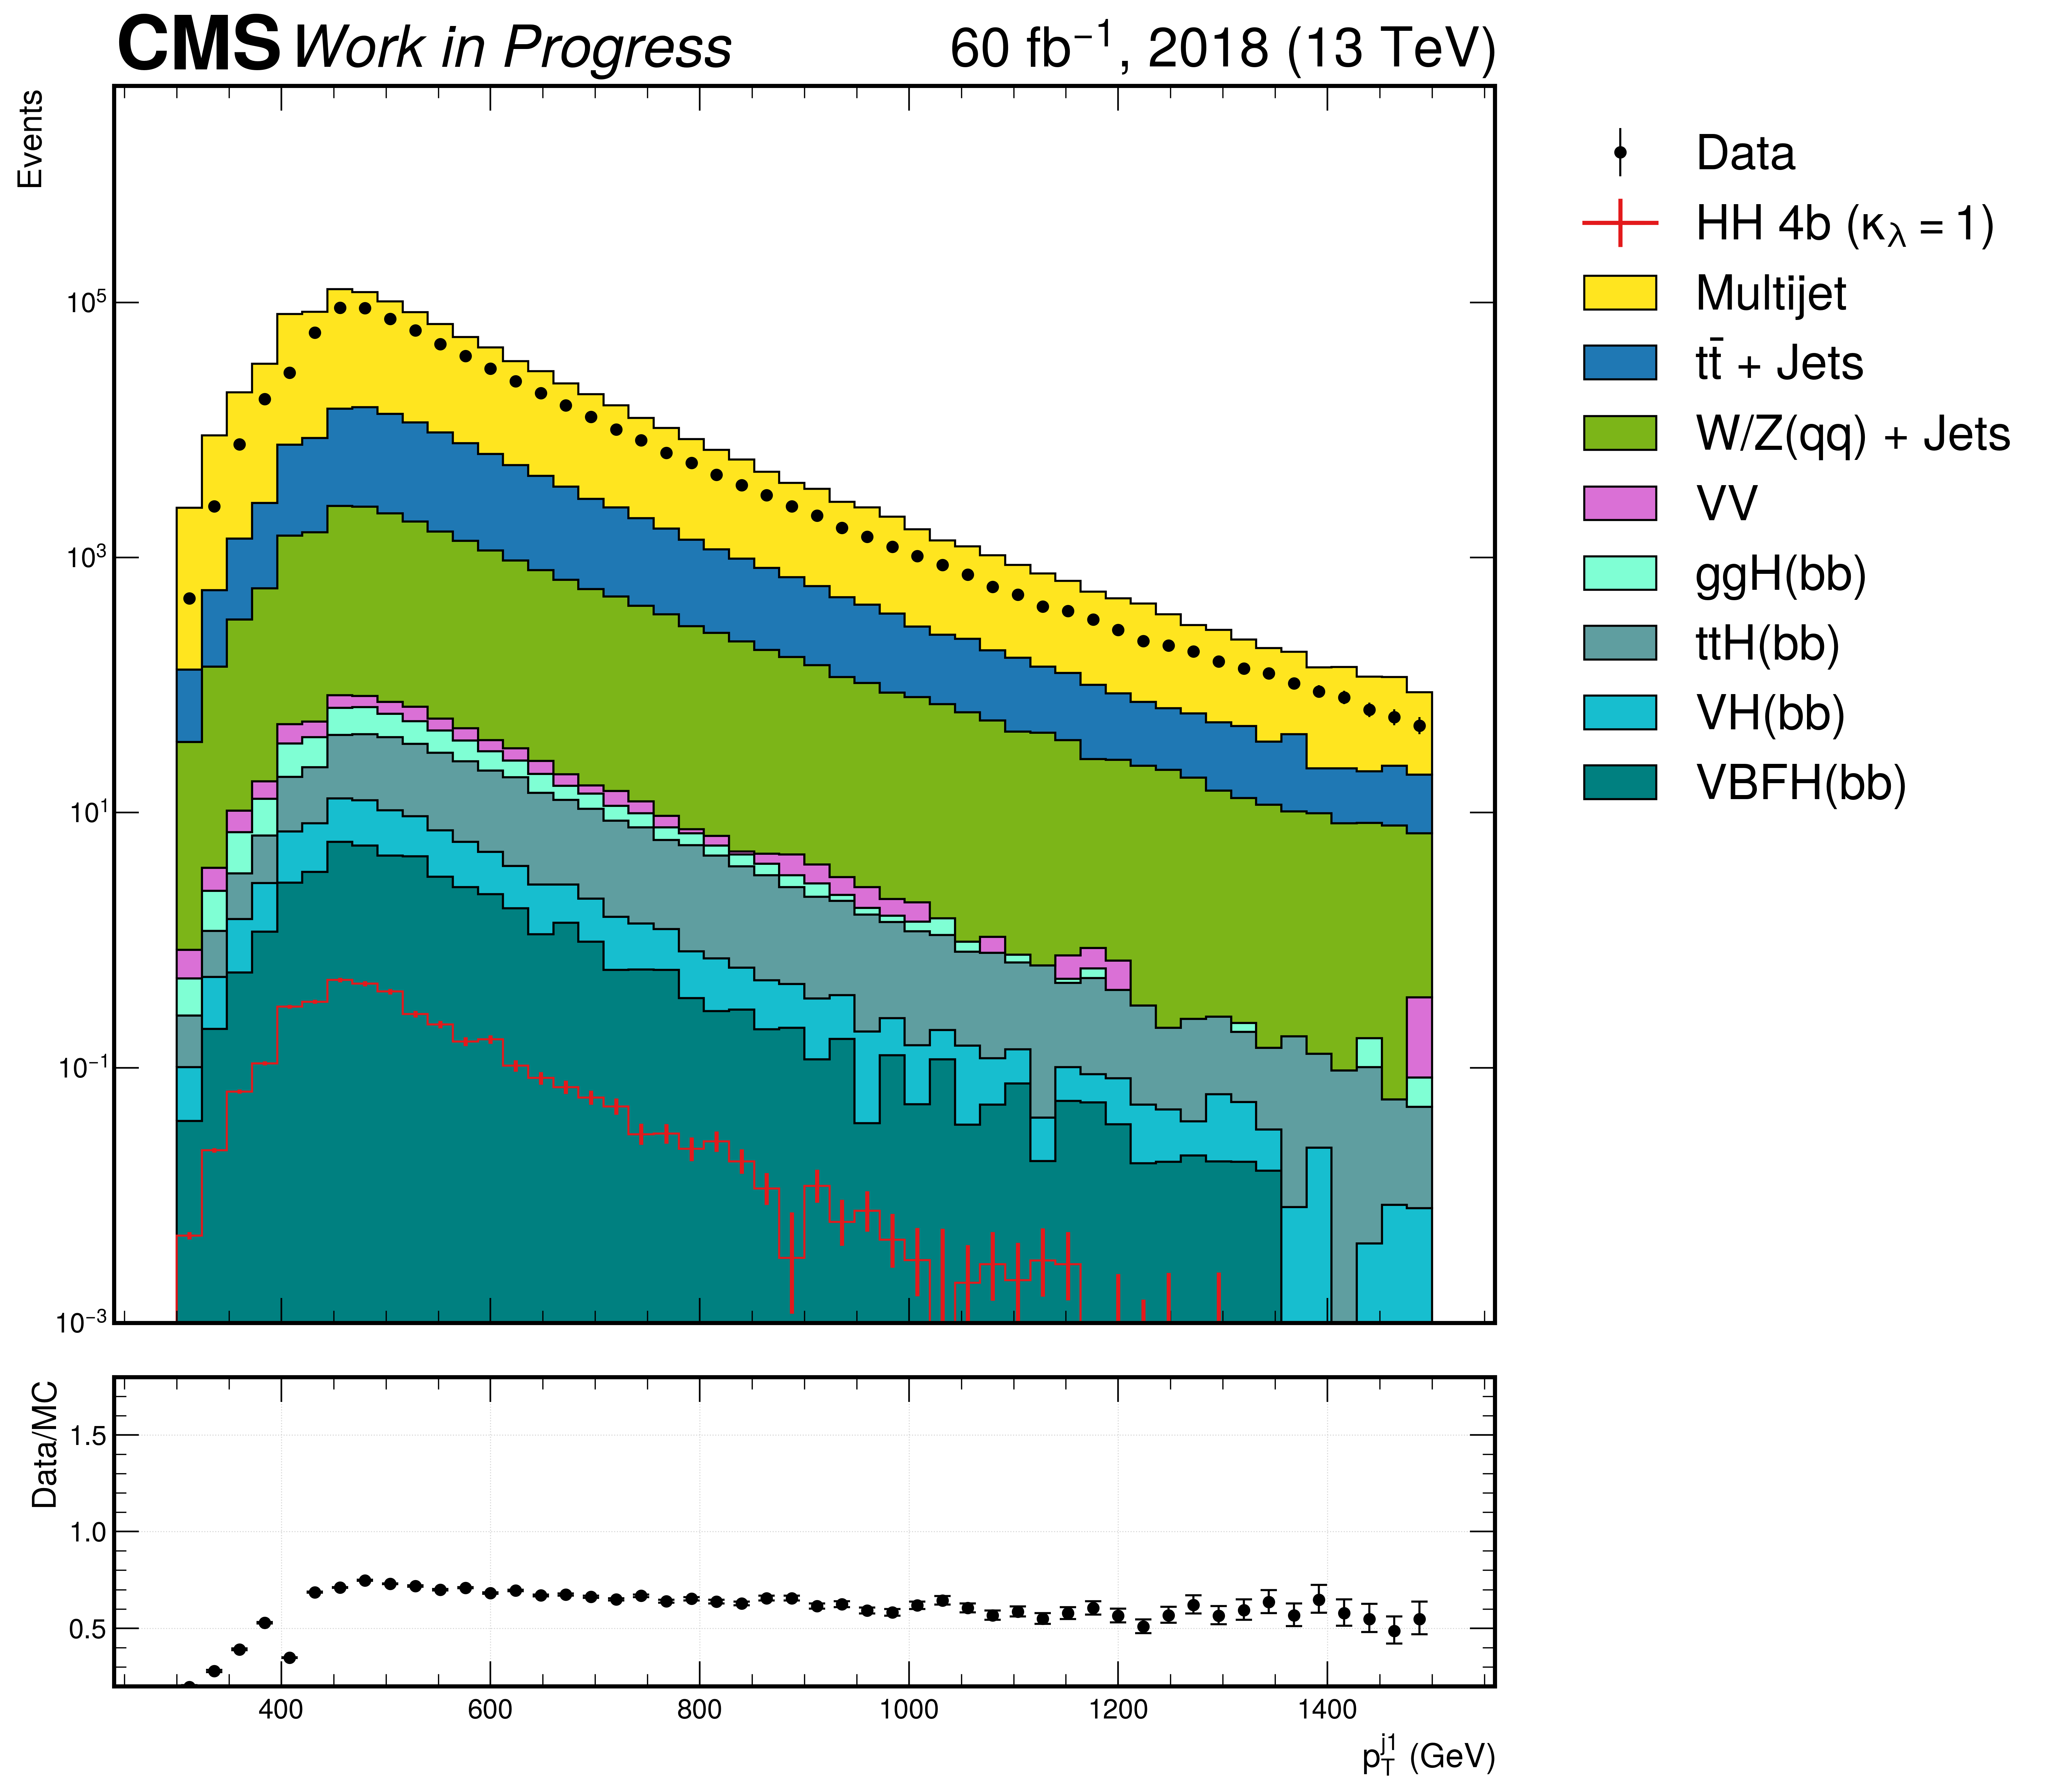

                    ┌────────────────────────────────────────────────────────┐
[-inf,  300) 0      │                                                        │
[ 300,  324) 0.6741 │▎                                                       │
[ 324,  348) 0.6834 │▎                                                       │
[ 348,  372) 0.6649 │▎                                                       │
[ 372,  396) 0.6521 │▎                                                       │
[ 396,  420) 0.6406 │▎                                                       │
[ 420,  444) 0.7062 │▎                                                       │
[ 444,  468) 0.6802 │▎                                                       │
[ 468,  492) 0.659  │▎                                                       │
[ 492,  516) 0.6625 │▎                                                       │
[ 516,  540) 0.6444 │▎                                                       │
[ 540,  564) 0.6313 │▎                              

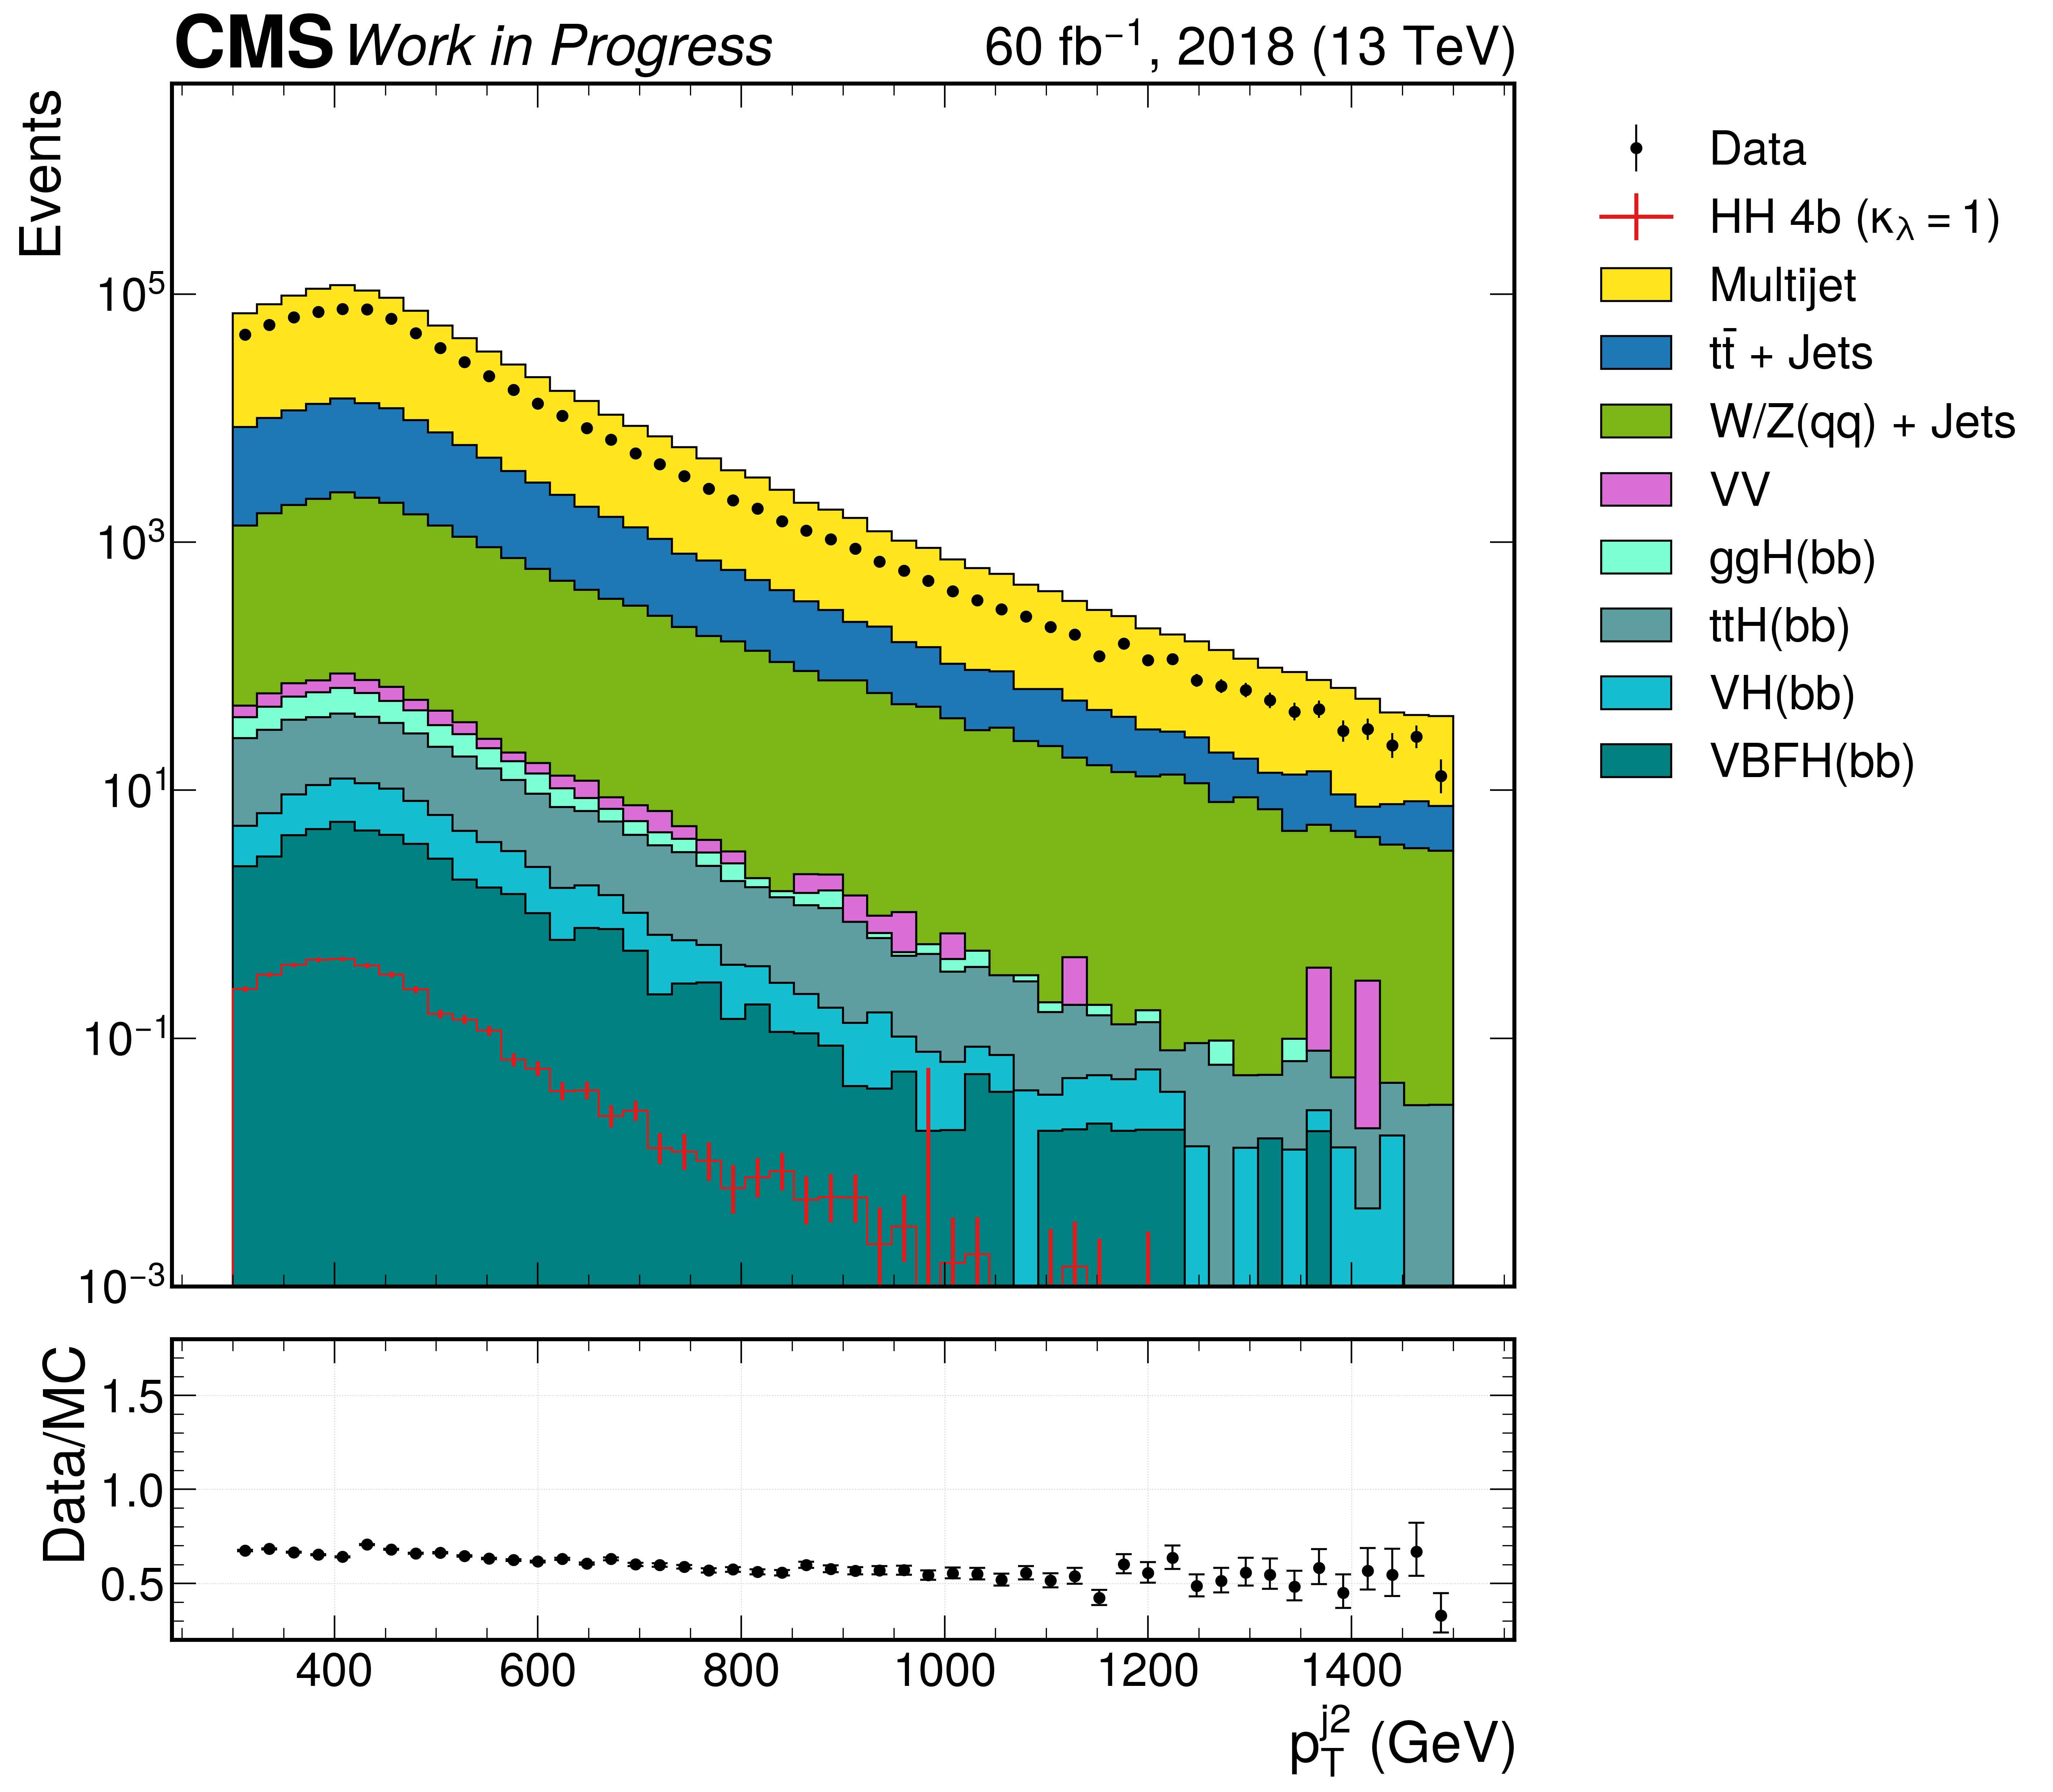

                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 68006  │████████████████████████████████████████████████████████ │
[  60,  70) 0.6767 │                                                         │
[  70,  80) 0.6721 │                                                         │
[  80,  90) 0.6566 │                                                         │
[  90, 100) 0.6516 │                                                         │
[ 100, 110) 0.6306 │                                                         │
[ 110, 120) 0.6343 │                                                         │
[ 120, 130) 0.6383 │                                                         │
[ 130, 140) 0.6383 │                                                         │
[ 140, 150) 0.6348 │                                                         │
[ 150, 160) 0.6625 │                                                         │
[ 160, 170) 0.6635 │                                

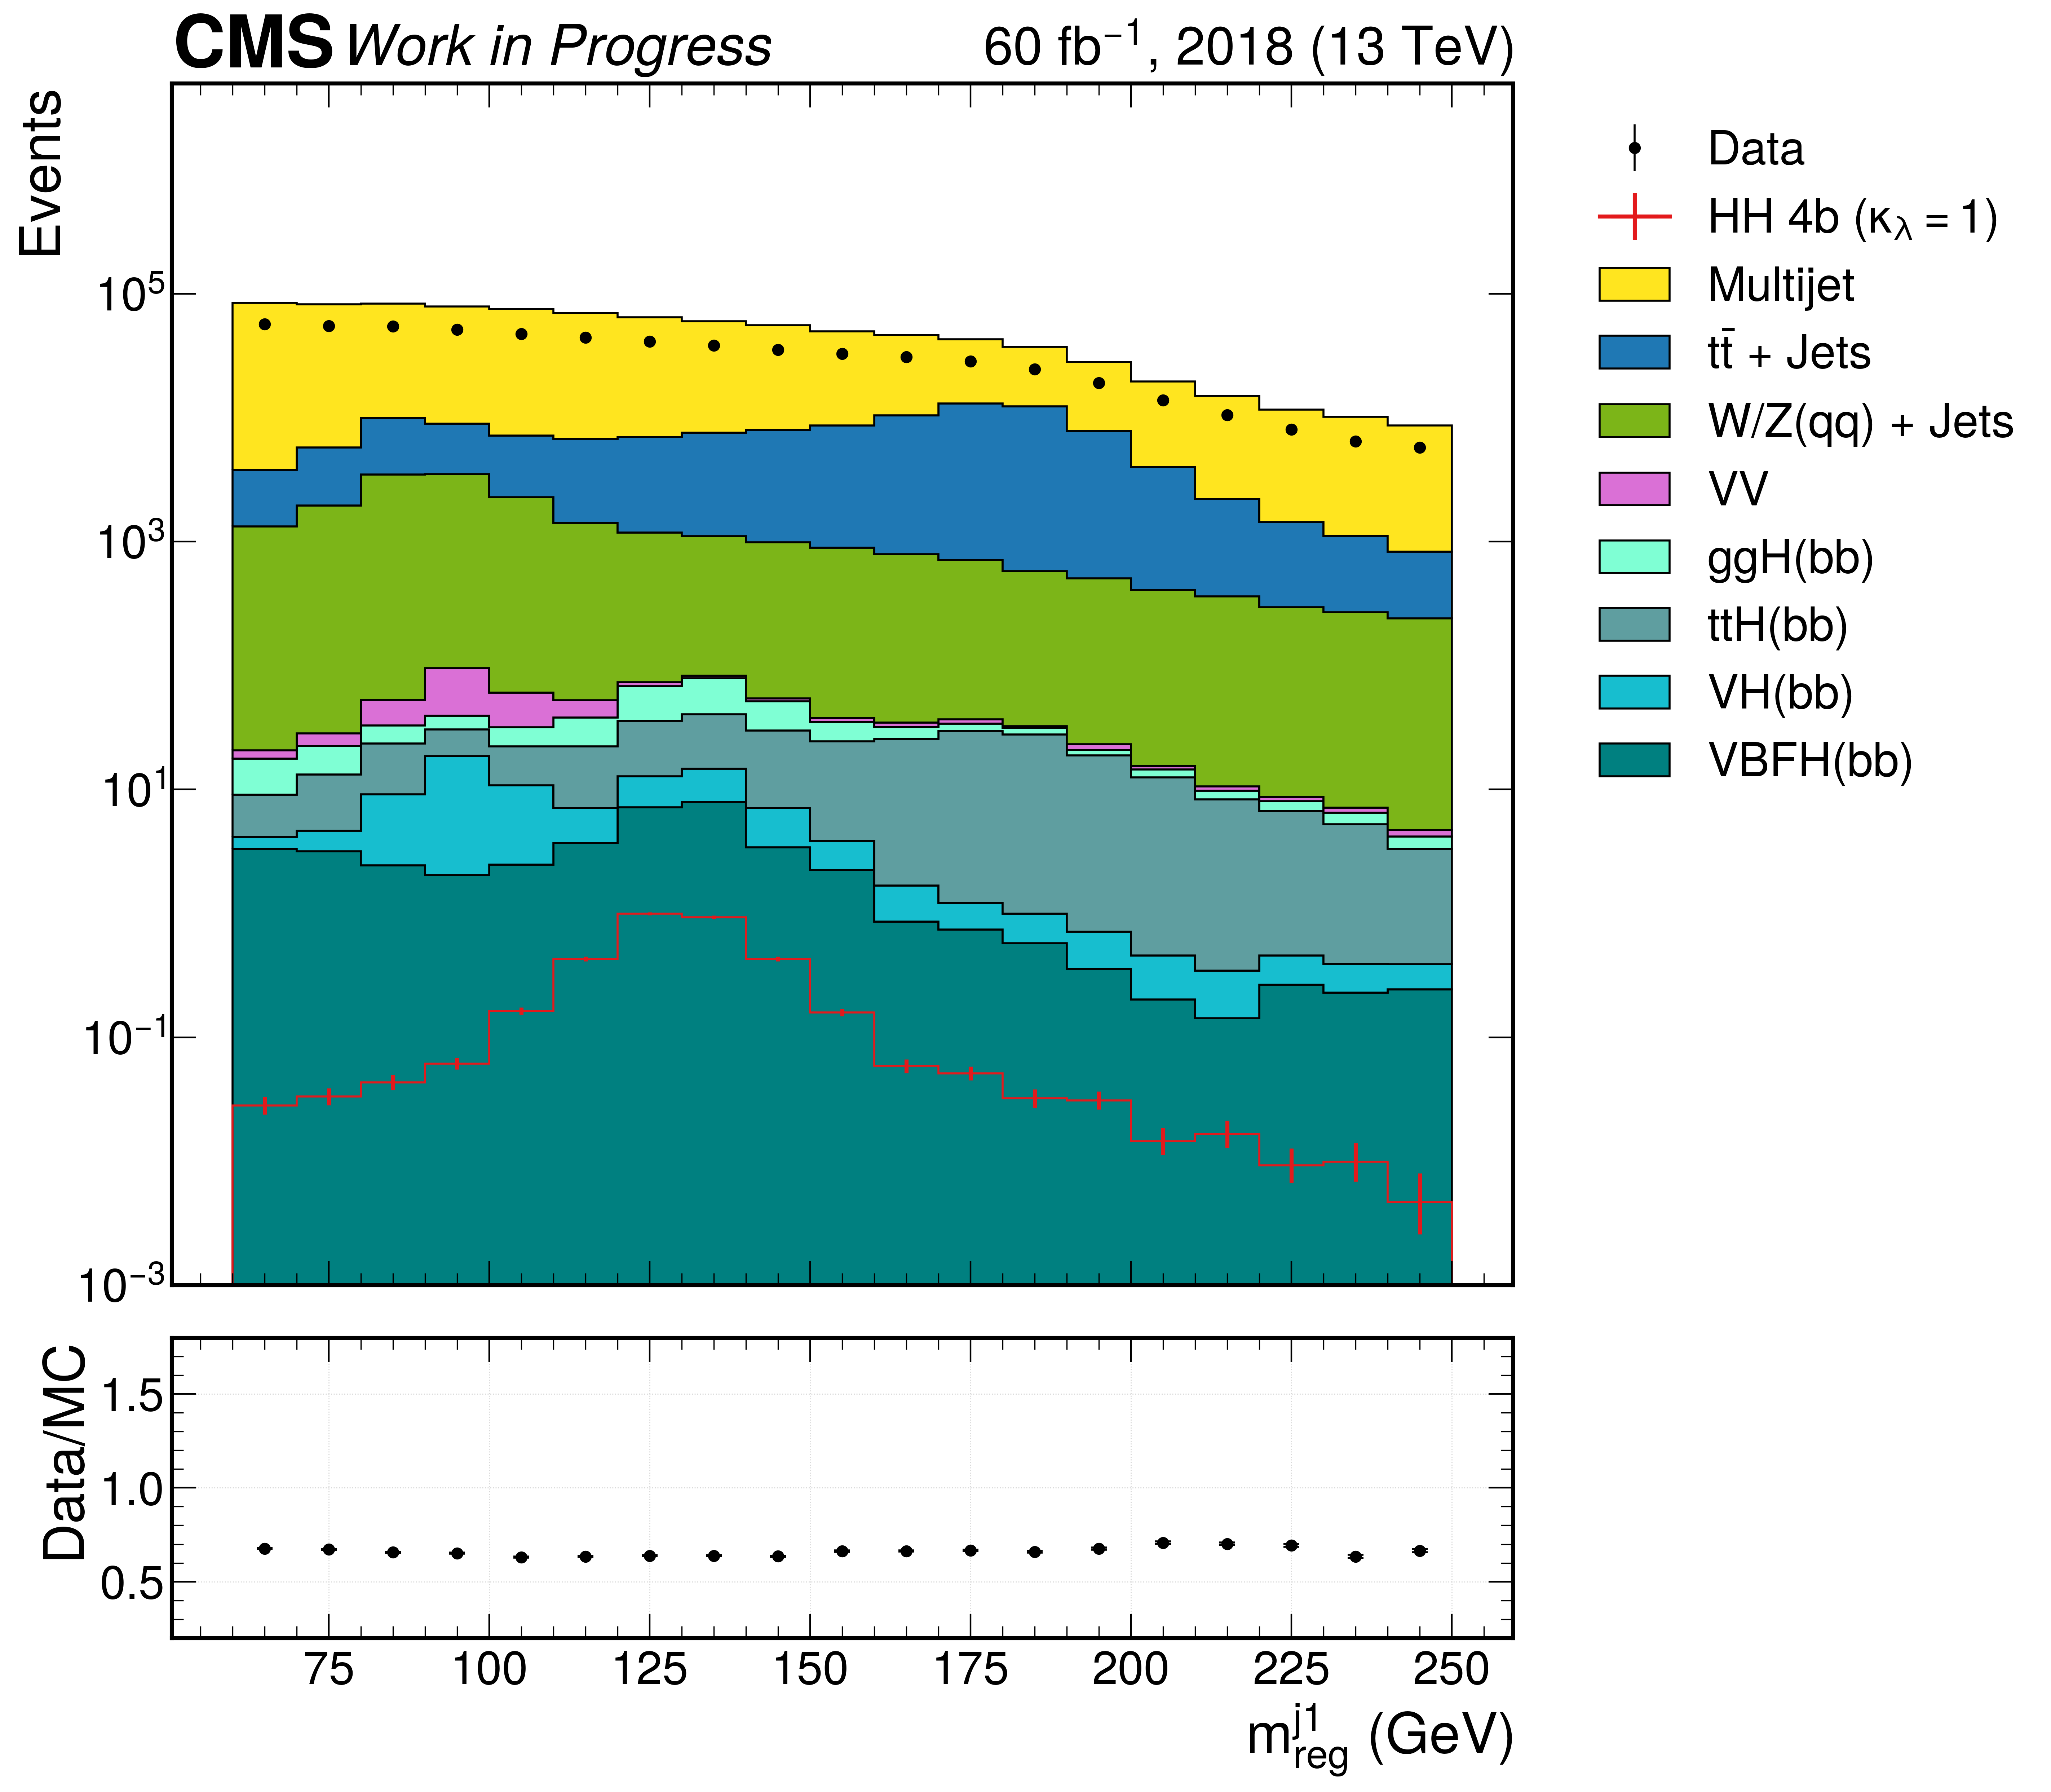

                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 67870  │████████████████████████████████████████████████████████ │
[  60,  70) 0.7011 │                                                         │
[  70,  80) 0.6772 │                                                         │
[  80,  90) 0.6391 │                                                         │
[  90, 100) 0.6344 │                                                         │
[ 100, 110) 0.6334 │                                                         │
[ 110, 120) 0.6302 │                                                         │
[ 120, 130) 0.6479 │                                                         │
[ 130, 140) 0.6595 │                                                         │
[ 140, 150) 0.6492 │                                                         │
[ 150, 160) 0.6494 │                                                         │
[ 160, 170) 0.6587 │                                

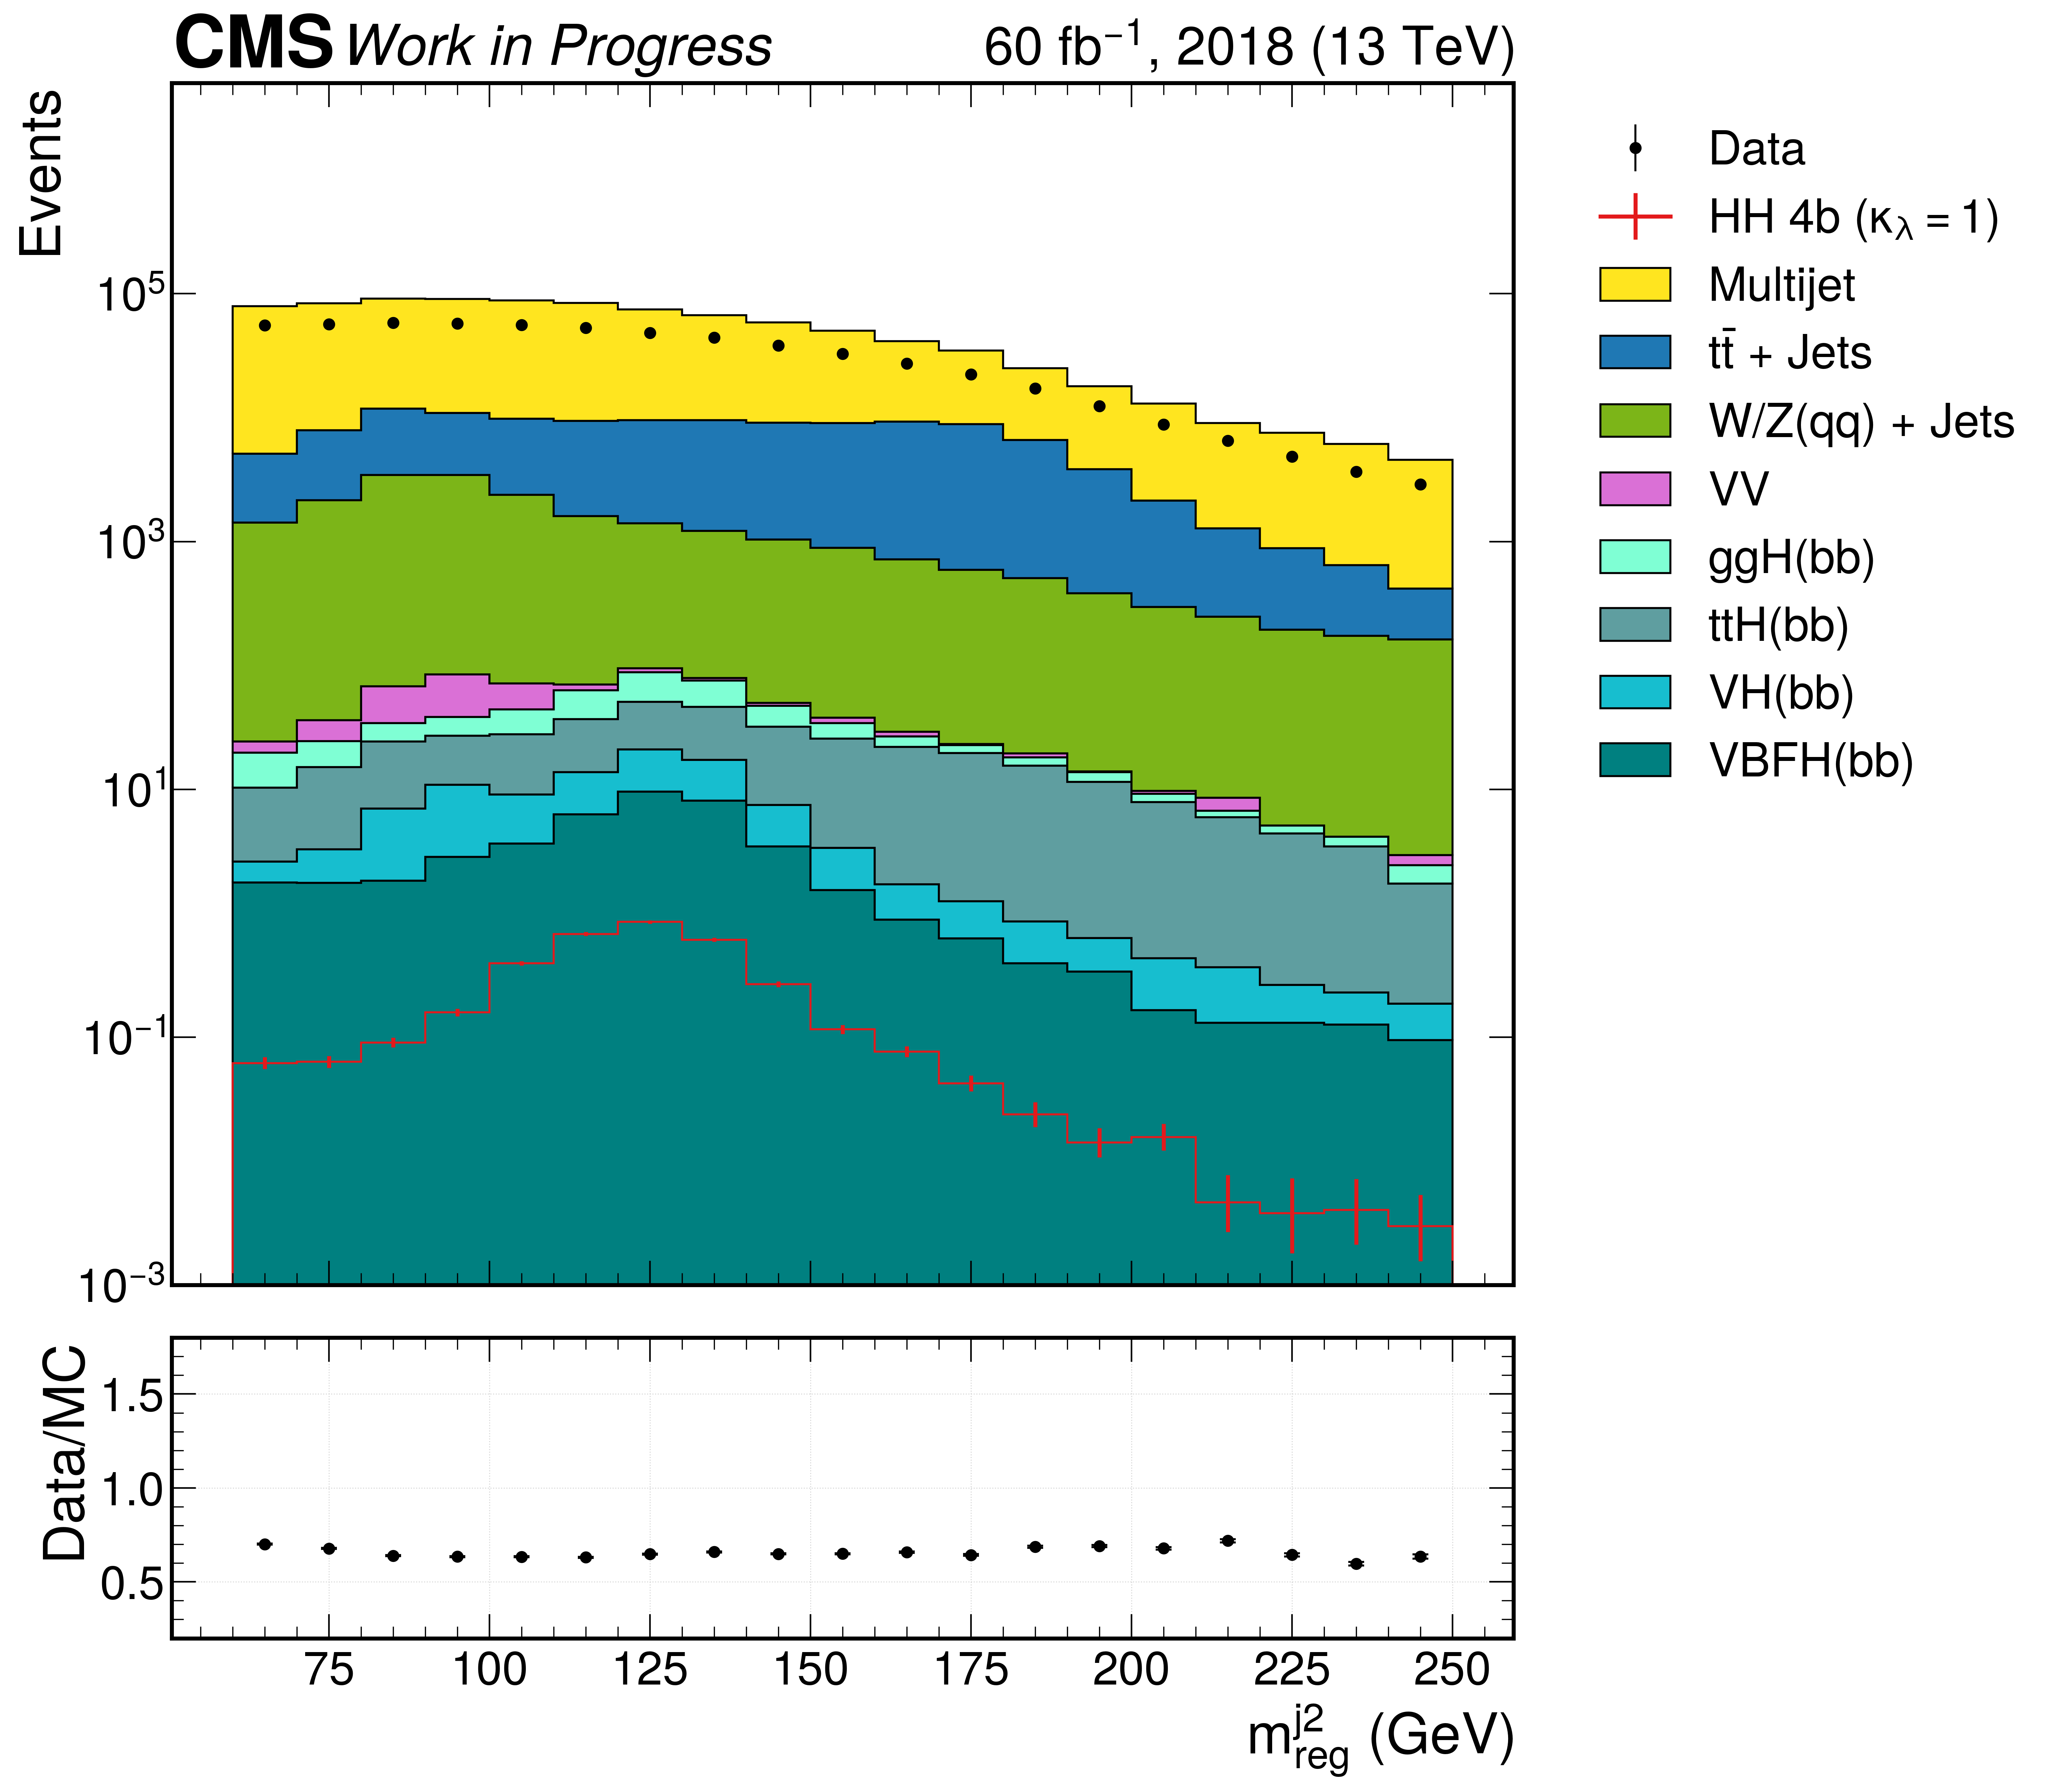

                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 90538  │████████████████████████████████████████████████████████ │
[  60,  70) 0.6633 │                                                         │
[  70,  80) 0.6549 │                                                         │
[  80,  90) 0.6437 │                                                         │
[  90, 100) 0.6403 │                                                         │
[ 100, 110) 0.6304 │                                                         │
[ 110, 120) 0.6223 │                                                         │
[ 120, 130) 0.6214 │                                                         │
[ 130, 140) 0.6314 │                                                         │
[ 140, 150) 0.6494 │                                                         │
[ 150, 160) 0.6523 │                                                         │
[ 160, 170) 0.6636 │                                

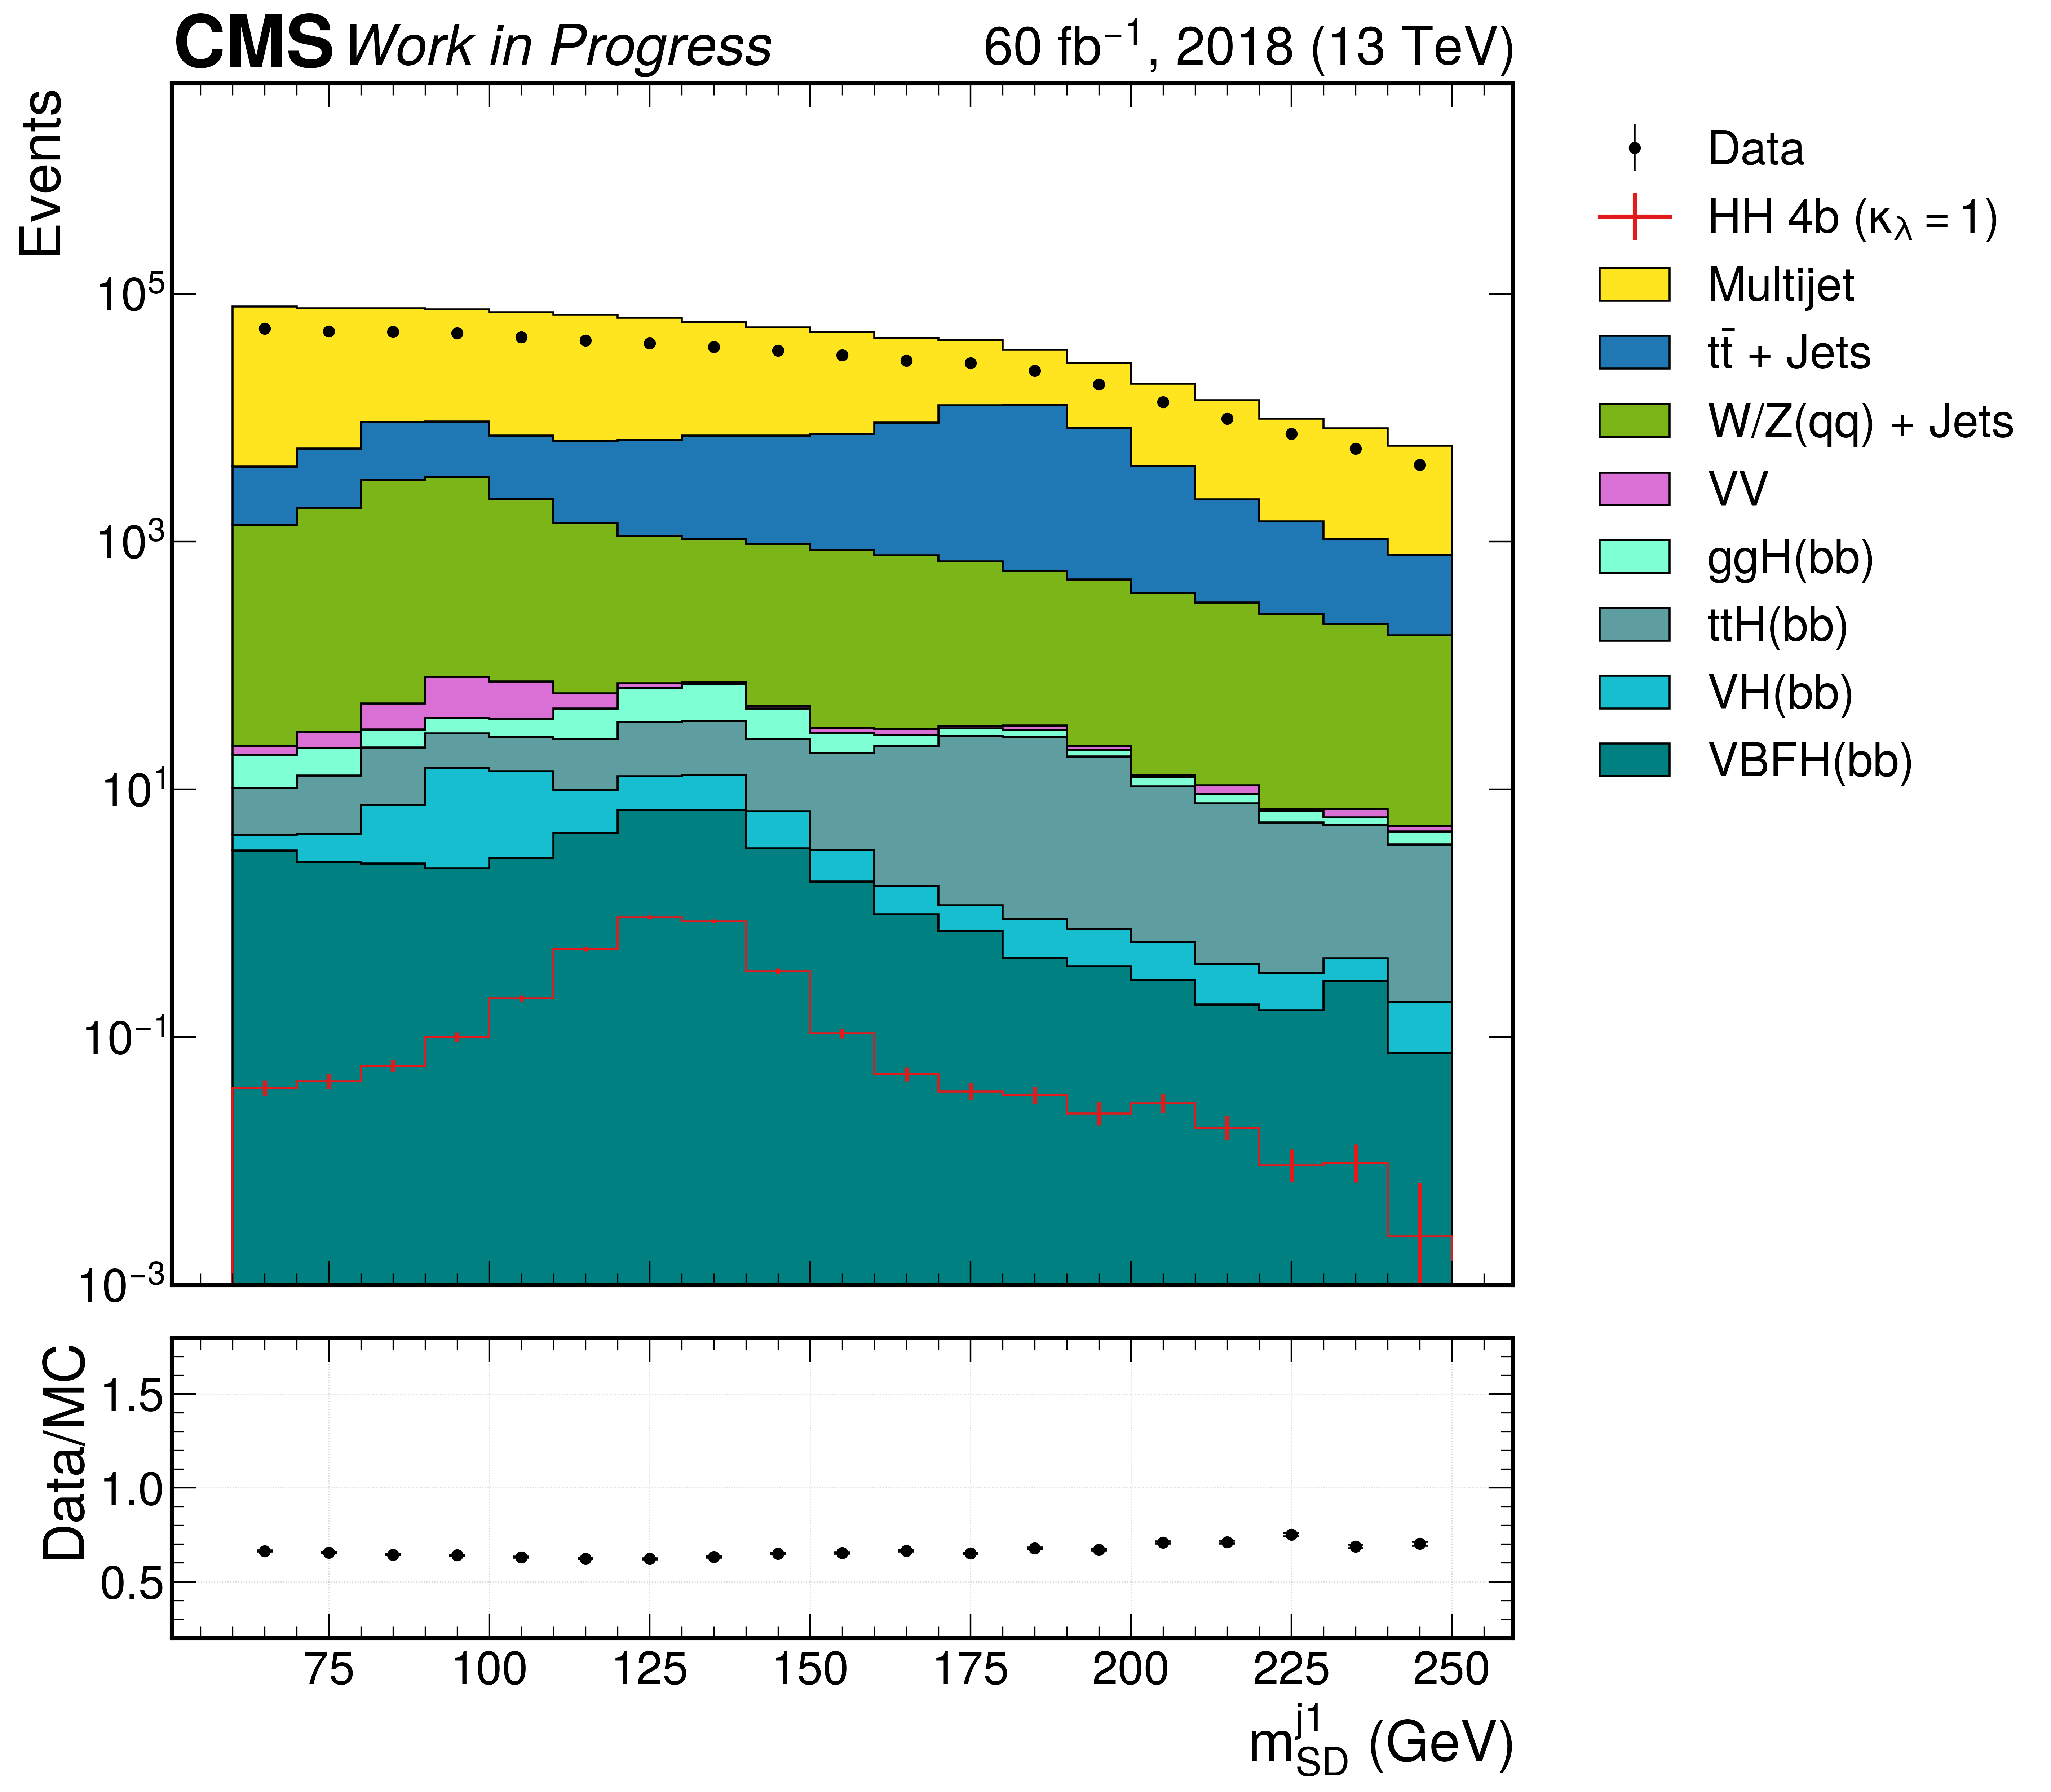

                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 86287  │████████████████████████████████████████████████████████ │
[  60,  70) 0.6762 │                                                         │
[  70,  80) 0.654  │                                                         │
[  80,  90) 0.6405 │                                                         │
[  90, 100) 0.6261 │                                                         │
[ 100, 110) 0.6206 │                                                         │
[ 110, 120) 0.6372 │                                                         │
[ 120, 130) 0.6419 │                                                         │
[ 130, 140) 0.6634 │                                                         │
[ 140, 150) 0.6525 │                                                         │
[ 150, 160) 0.6526 │                                                         │
[ 160, 170) 0.6603 │                                

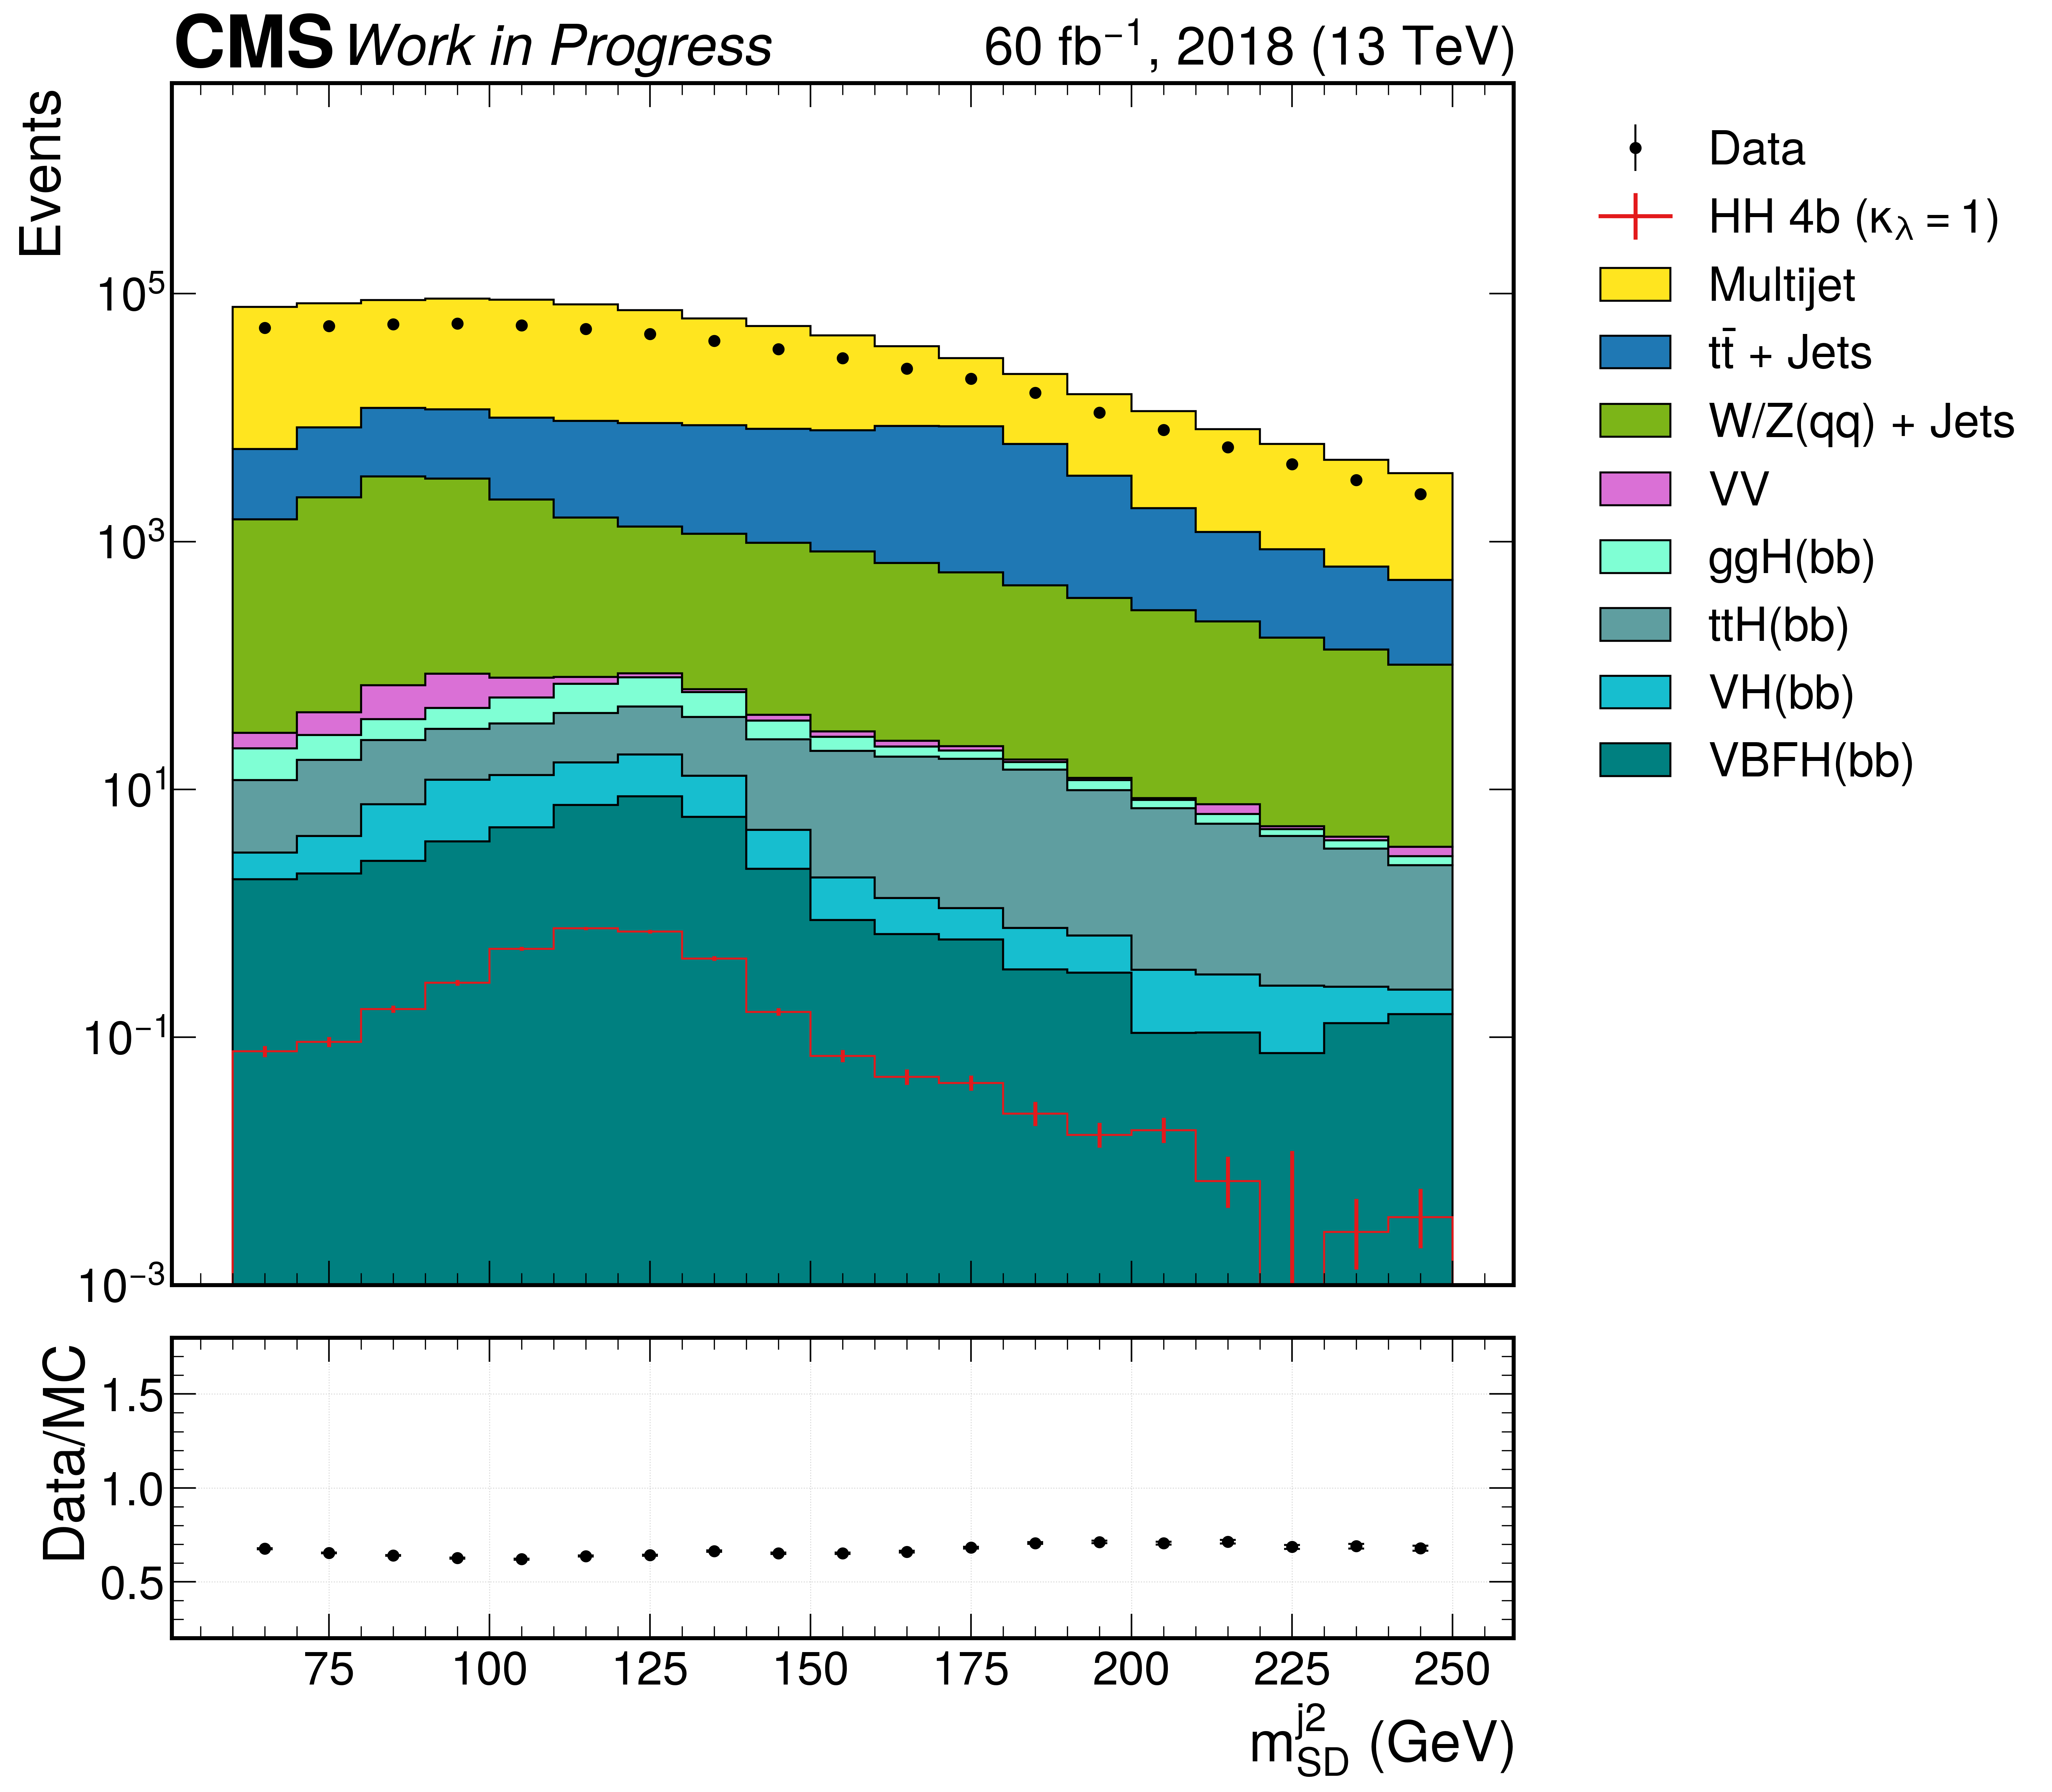

In [9]:
ylims = {
    "2018": 5e6,
    "2022": 1e5,
    "2022EE": 4e5,
}

# {var: (bins, label)}
control_plot_vars = [
    # var must match key in events dictionary (i.e. as saved in parquet file)
    # ShapeVar(var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]),
    ShapeVar(var="ak8FatJetPt0", label=r"$p_T^{j1}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(var="ak8FatJetPt1", label=r"$p_T^{j2}$ (GeV)", bins=[50, 300, 1500]),
    ShapeVar(
        var="ak8FatJetPNetMass0",
        label=r"$m_{reg}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetPNetMass1",
        label=r"$m_{reg}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd0",
        label=r"$m_{SD}^{j1}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    ShapeVar(
        var="ak8FatJetMsd1",
        label=r"$m_{SD}^{j2}$ (GeV)",
        bins=[19, 60, 250],
        significance_dir="bin",
    ),
    # ShapeVar(
    #     var="ak8FatJetPNetXbb0",
    #     label=r"$T_{Xbb}^{j1}$",
    #     bins=[50, 0.0, 1],
    # ),
    # ShapeVar(
    #     var="ak8FatJetPNetXbb1",
    #     label=r"$T_{Xbb}^{j2}$",
    #     bins=[50, 0.0, 1],
    # ),
    # ShapeVar(
    #     var="ht",
    #     label=r"HT (GeV)",
    #     bins=[50, 0, 4000],
    # ),
]

hists = {}
for shape_var in control_plot_vars:
    if shape_var.var not in hists:
        hists[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key="weight",
        )

sig_keys = ["hh4b"]
for shape_var in control_plot_vars:
    name = f"{plot_dir}/{shape_var.var}.pdf"
    plotting.ratioHistPlot(
        hists[shape_var.var],
        year,
        sig_keys,
        bg_keys,
        name=name,
        show=True,
        log=True,
        plot_significance=False,
        significance_dir=shape_var.significance_dir,
        ratio_ylims=[0.2, 1.8],
        ylim=ylims[year],
        energy="13"
    )
    # break

mSD vs mReg

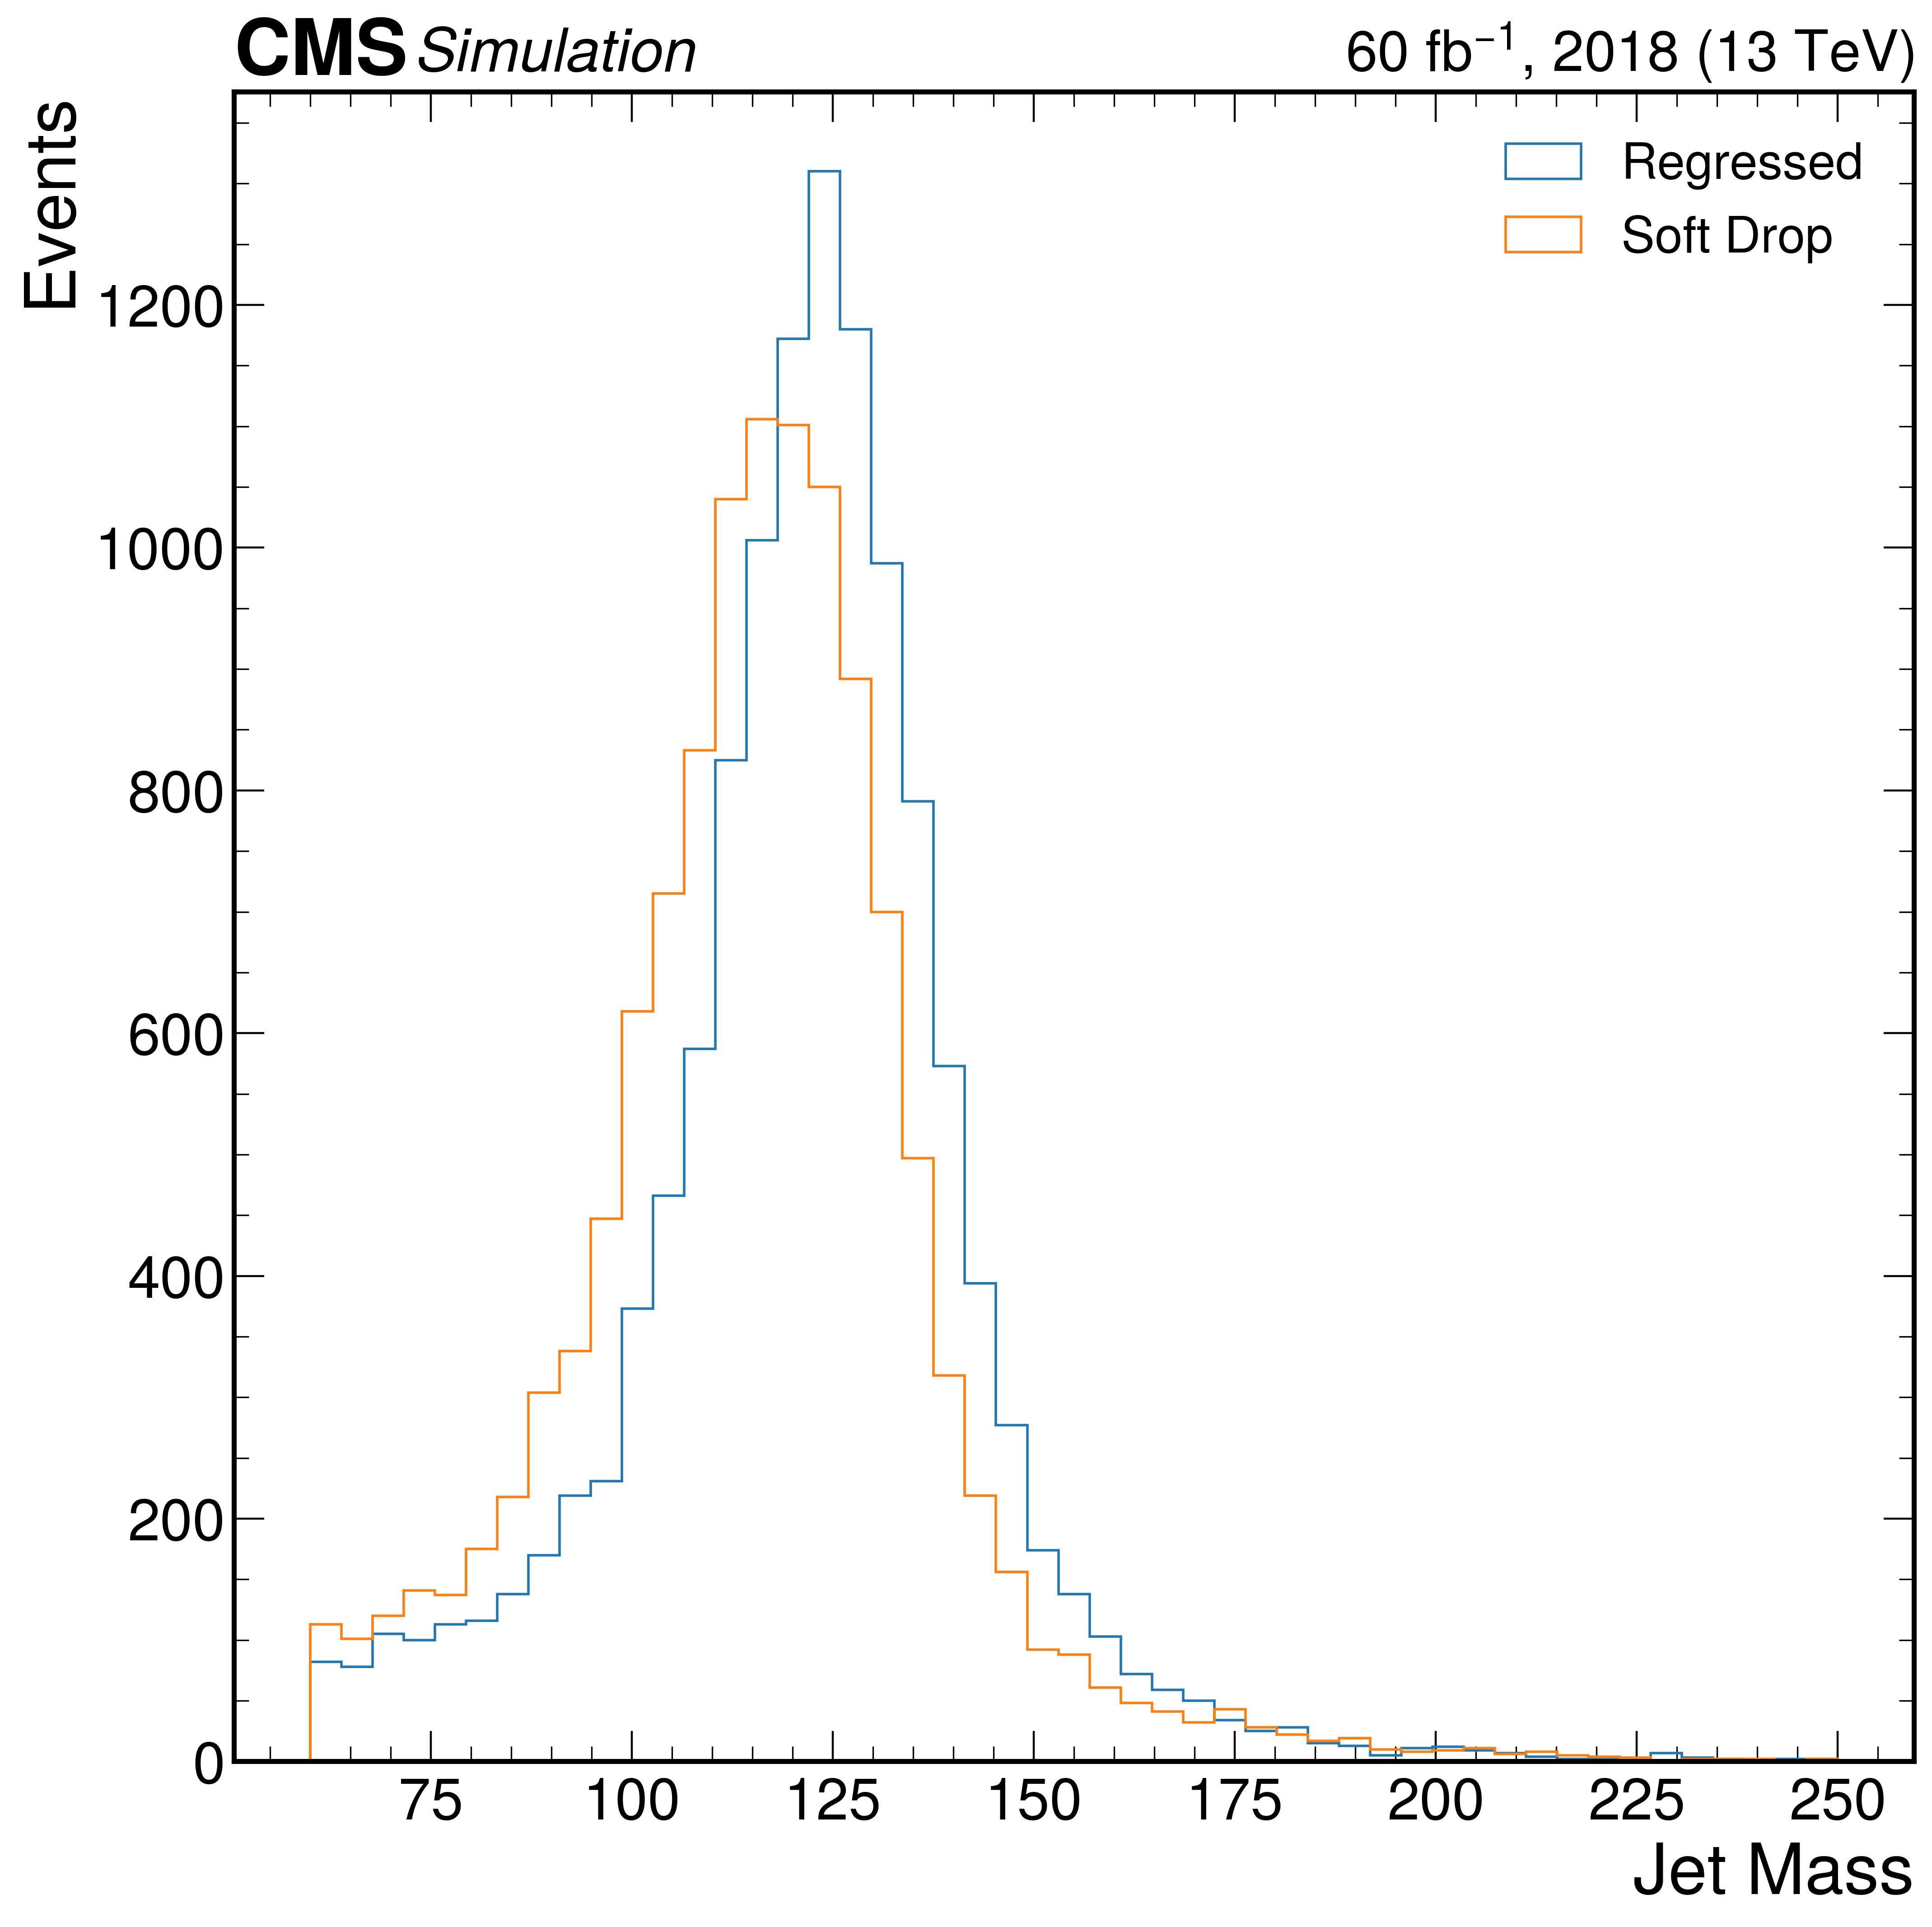

In [10]:
events = events_dict["hh4b"]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
plt.rcParams.update({"font.size": 24})

bins = np.linspace(60, 250, 50)

ax.hist(
    events["ak8FatJetPNetMass"][1],
    bins=bins,
    histtype="step",
    label="Regressed",
)

ax.hist(
    events["ak8FatJetMsd"][1],
    bins=bins,
    histtype="step",
    label="Soft Drop",
)

ax.set_xlabel("Jet Mass")
ax.set_ylabel("Events")

hep.cms.label(data=False, year=year, lumi=round(LUMI[year] / 1e3), com="13")

ax.legend()
plt.savefig(f"{plot_dir}/msd_mreg.pdf", bbox_inches="tight")
plt.show()

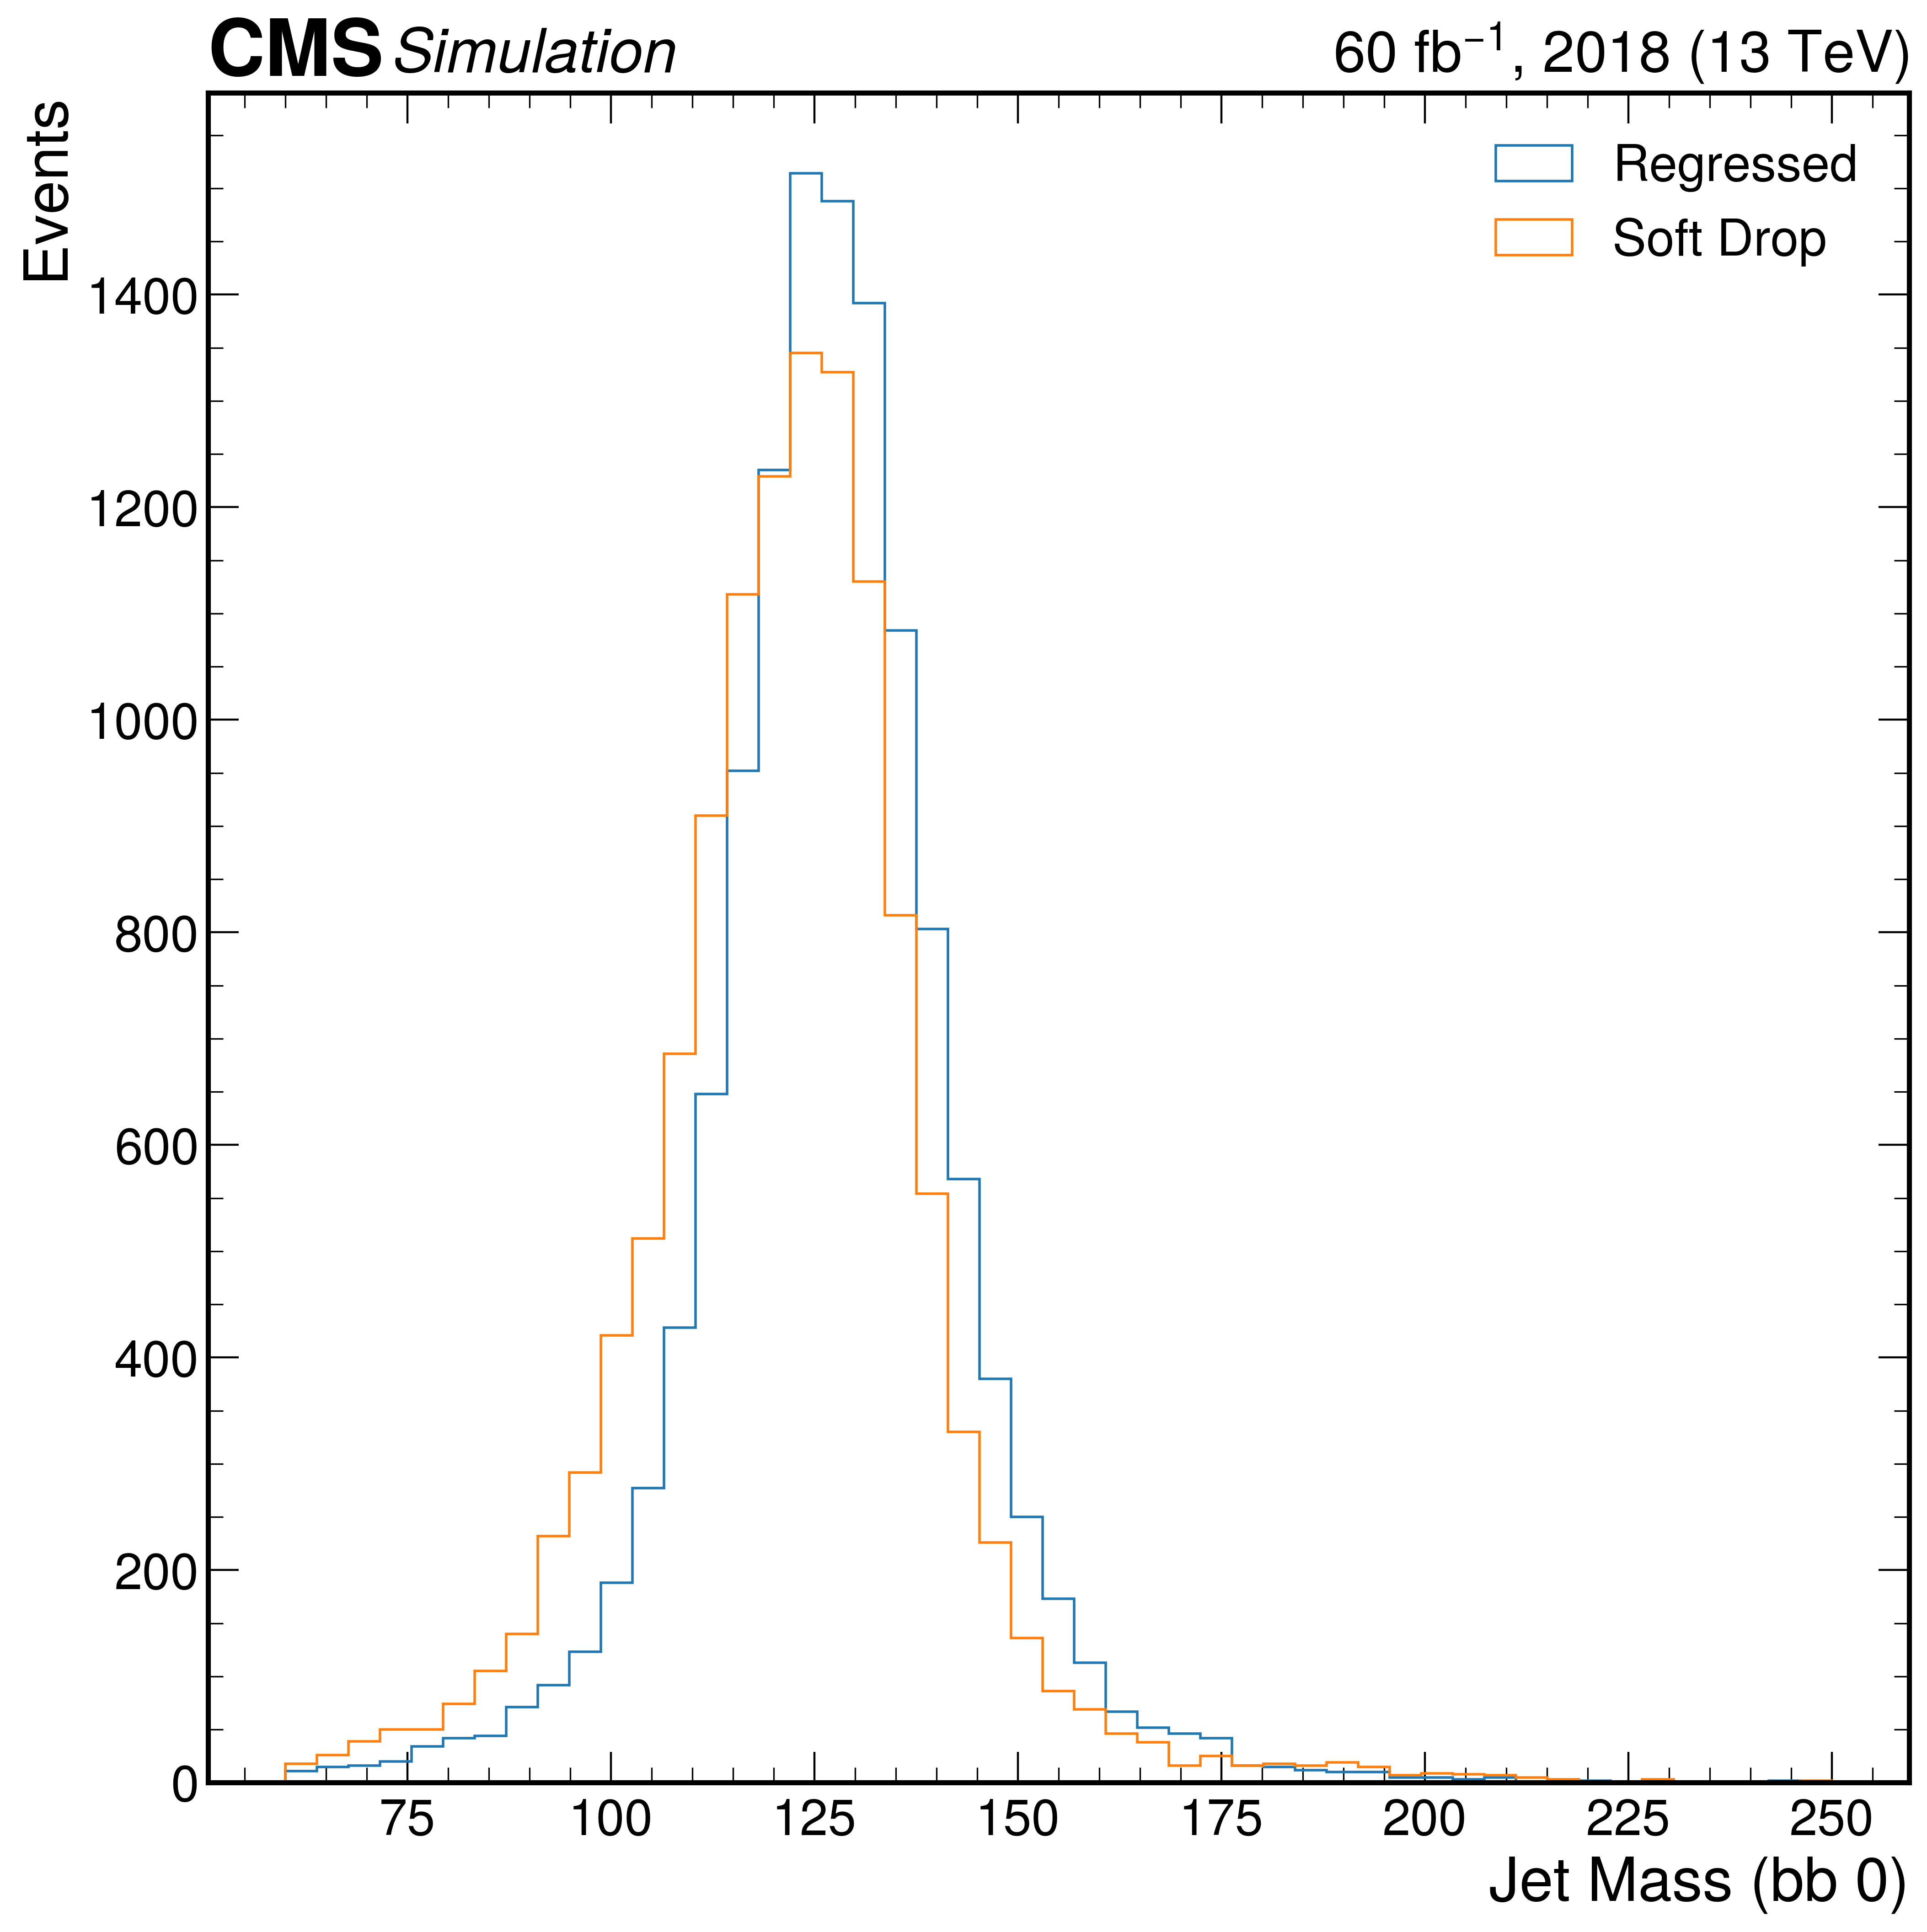

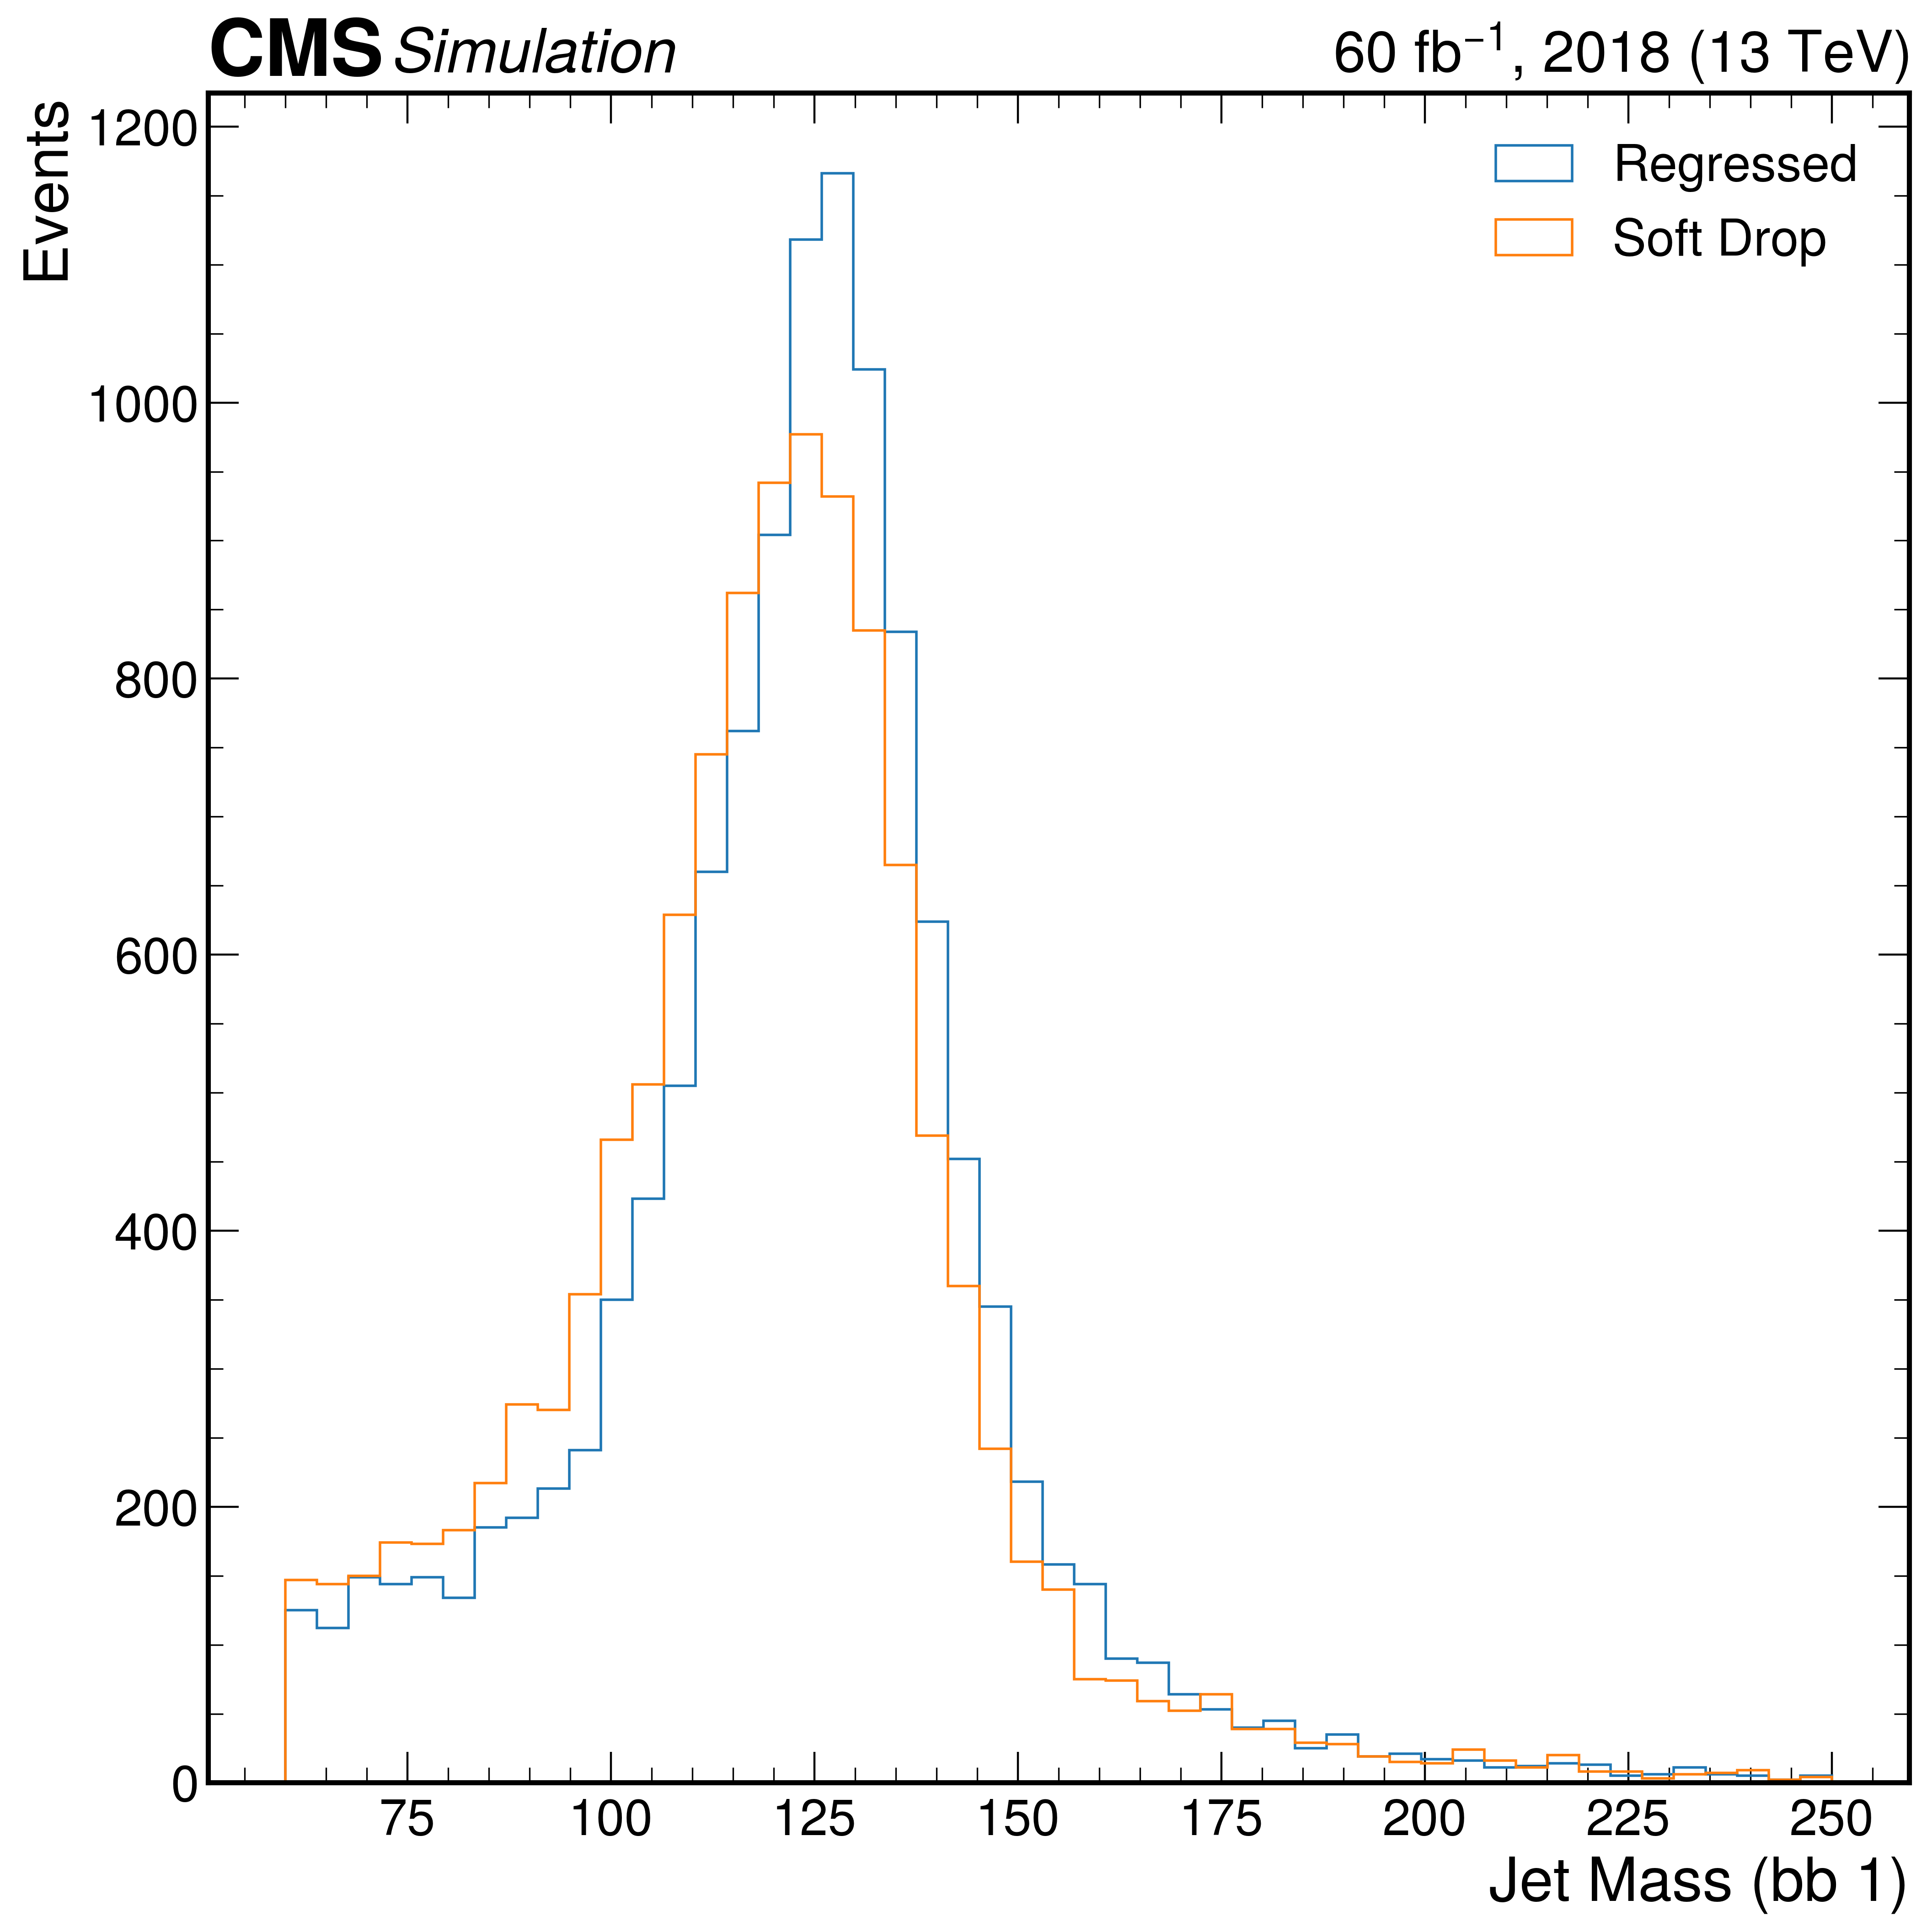

In [11]:
events = events_dict["hh4b"]

for i in range(2):
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    plt.rcParams.update({"font.size": 24})
    bins = np.linspace(60, 250, 50)
    ax.hist(
        utils.get_feat(events, f"bb{i}FatJetPNetMass", bb_masks["hh4b"]),
        bins=bins,
        histtype="step",
        label="Regressed",
    )
    ax.hist(
        utils.get_feat(events, f"bb{i}FatJetMsd", bb_masks["hh4b"]),
        bins=bins,
        histtype="step",
        label="Soft Drop",
    )
    ax.set_xlabel(f"Jet Mass (bb {i})")
    ax.set_ylabel("Events")
    hep.cms.label(data=False, year=year, lumi=round(LUMI[year] / 1e3), com="13")
    ax.legend()
    plt.savefig(f"{plot_dir}/msd_mreg_bb{i}.pdf", bbox_inches="tight")
    plt.show()



## ROC Curve

Get true Higgses

In [12]:
events = events_dict["hh4b"]

indexak8 = events["ak8FatJetHiggsMatchIndex"].to_numpy()
nbh1ak8 = events["ak8FatJetNumBMatchedH1"].to_numpy()
nbh2ak8 = events["ak8FatJetNumBMatchedH2"].to_numpy()

# ak8 jets matched to h1 and h2
h1ak8 = indexak8 == 0
h2ak8 = indexak8 == 1
num_ak8m2h1 = h1ak8.sum(axis=1)
num_ak8m2h2 = h2ak8.sum(axis=1)
h1m1ak8 = num_ak8m2h1 == 1
h2m1ak8 = num_ak8m2h2 == 1

# ak8 jets matched to 2 b-quarks
h1ak8nb2 = (indexak8 == 0) & (nbh1ak8 == 2)
h2ak8nb2 = (indexak8 == 1) & (nbh2ak8 == 2)
h1m1ak8b2 = h1ak8nb2.sum(axis=1) == 1
h2m1ak8b2 = h2ak8nb2.sum(axis=1) == 1
boosted_nb2 = h1m1ak8b2 & h2m1ak8b2

# fatjet matched to H1
fj_mwh1_idx = events["ak8FatJetHiggsMatchIndex"].to_numpy() == 0
fj_score = events["ak8FatJetPNetXbb"].to_numpy()
sig_jets_score = fj_score[boosted_nb2][fj_mwh1_idx[boosted_nb2]]
sig_jets_score.shape

sig_jets_score = fj_score[fj_mwh1_idx]
sig_jets_score.shape

(11849,)

In [13]:
bg_jets_score = events_dict["qcd"]["ak8FatJetPNetXbb"].values.reshape(-1)[2:]
bg_jets_score.shape

(401092,)

In [14]:
from sklearn.metrics import roc_curve

bg_skip = 4
sig_key = "hh4b"
bg_keys = ["qcd"] 

y_true = np.concatenate(
    [
        np.ones(len(sig_jets_score)),
        np.zeros(len(bg_jets_score) // bg_skip),
    ]
)

scores = np.concatenate((sig_jets_score, bg_jets_score[::bg_skip]))

fpr, tpr, thresholds = roc_curve(y_true, scores)

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

plot_thresholds = [0.35, 0.8, 0.95, 0.975, 0.985, 0.99]
th_colours = ["#9381FF", "#1f78b4", "#a6cee3", "#ff7f00", "#7CB518", "#EDB458", "#36213E"]

pths = {th: [[], []] for th in plot_thresholds}
plt.figure(figsize=(12, 12))
plt.plot(
    tpr,
    fpr,
    linewidth=2,
)

for th in plot_thresholds:
    idx = find_nearest(thresholds, th)
    pths[th][0].append(tpr[idx])
    pths[th][1].append(fpr[idx])


for k, th in enumerate(plot_thresholds):
    plt.scatter(
        *pths[th],
        marker="o",
        s=40,
        label=rf"$T_{{Xbb}}$ > {th}",
        color=th_colours[k],
        zorder=100,
    )

    plt.vlines(
        x=pths[th][0],
        ymin=0,
        ymax=pths[th][1],
        color=th_colours[k],
        linestyles="dashed",
        alpha=0.5,
    )

    plt.hlines(
        y=pths[th][1],
        xmin=0,
        xmax=pths[th][0],
        color=th_colours[k],
        linestyles="dashed",
        alpha=0.5,
    )


hep.cms.label(data=False, year=year, com="13.6")
plt.yscale("log")
plt.xlabel("Signal efficiency")
plt.ylabel("Background efficiency")
plt.xlim([0, 1])
plt.ylim([1e-3, 1])
plt.legend(loc="upper left")
plt.savefig(f"{plot_dir}/roccurve.pdf", bbox_inches="tight")
plt.close()

### Cut-based selection

In [15]:
# {label: {cutvar: [min, max], ...}, ...}
# https://indico.cern.ch/event/959381/contributions/4041887/attachments/2114263/3556855/20201002_HHTo4B_Summary_B2GDiBosonMeeting.pdf slide 7

selection_regions = {
    "pass": Region(
        cuts={
            "bb0FatJetPNetXbb": [0.985, 1],
            "bb1FatJetPNetXbb": [0.985, 1],
            "bb0FatJetPt": [350, CUT_MAX_VAL],
            "bb1FatJetPt": [310, CUT_MAX_VAL],
            "bb0FatJetPNetMass": [105, 135],
            # "bb1FatJetPNetMass": [95, 135],
        },
        label="Pass",
    ),
    "fail": Region(
        cuts={
            "bb0FatJetPNetXbb": [-CUT_MAX_VAL, 0.985],
            "bb1FatJetPNetXbb": [-CUT_MAX_VAL, 0.985],
            "bb0FatJetPt": [350, CUT_MAX_VAL],
            "bb1FatJetPt": [310, CUT_MAX_VAL],
            "bb0FatJetPNetMass": [105, 135],
        },
        label="Fail",
    ),
}

fit_shape_var = ShapeVar(
    "bb1FatJetPNetMass",
    r"$m^{2}_\mathrm{Reg}$ (GeV)",
    #[19, 60, 250],
    [17, 50, 220],
    reg=True,
    blind_window=[100, 150],
)

pass
                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 1      │█████████▏                                               │
[  60,  70) 6.107  │████████████████████████████████████████████████████████ │
[  70,  80) 5.194  │███████████████████████████████████████████████▋         │
[  80,  90) 0      │                                                         │
[  90, 100) 1.195  │███████████                                              │
[ 100, 110) 0      │                                                         │
[ 110, 120) 0      │                                                         │
[ 120, 130) 0      │                                                         │
[ 130, 140) 0      │                                                         │
[ 140, 150) 0      │                                                         │
[ 150, 160) 1.875  │█████████████████▎                                       │
[ 160, 170) 0.2984 │██▊                        

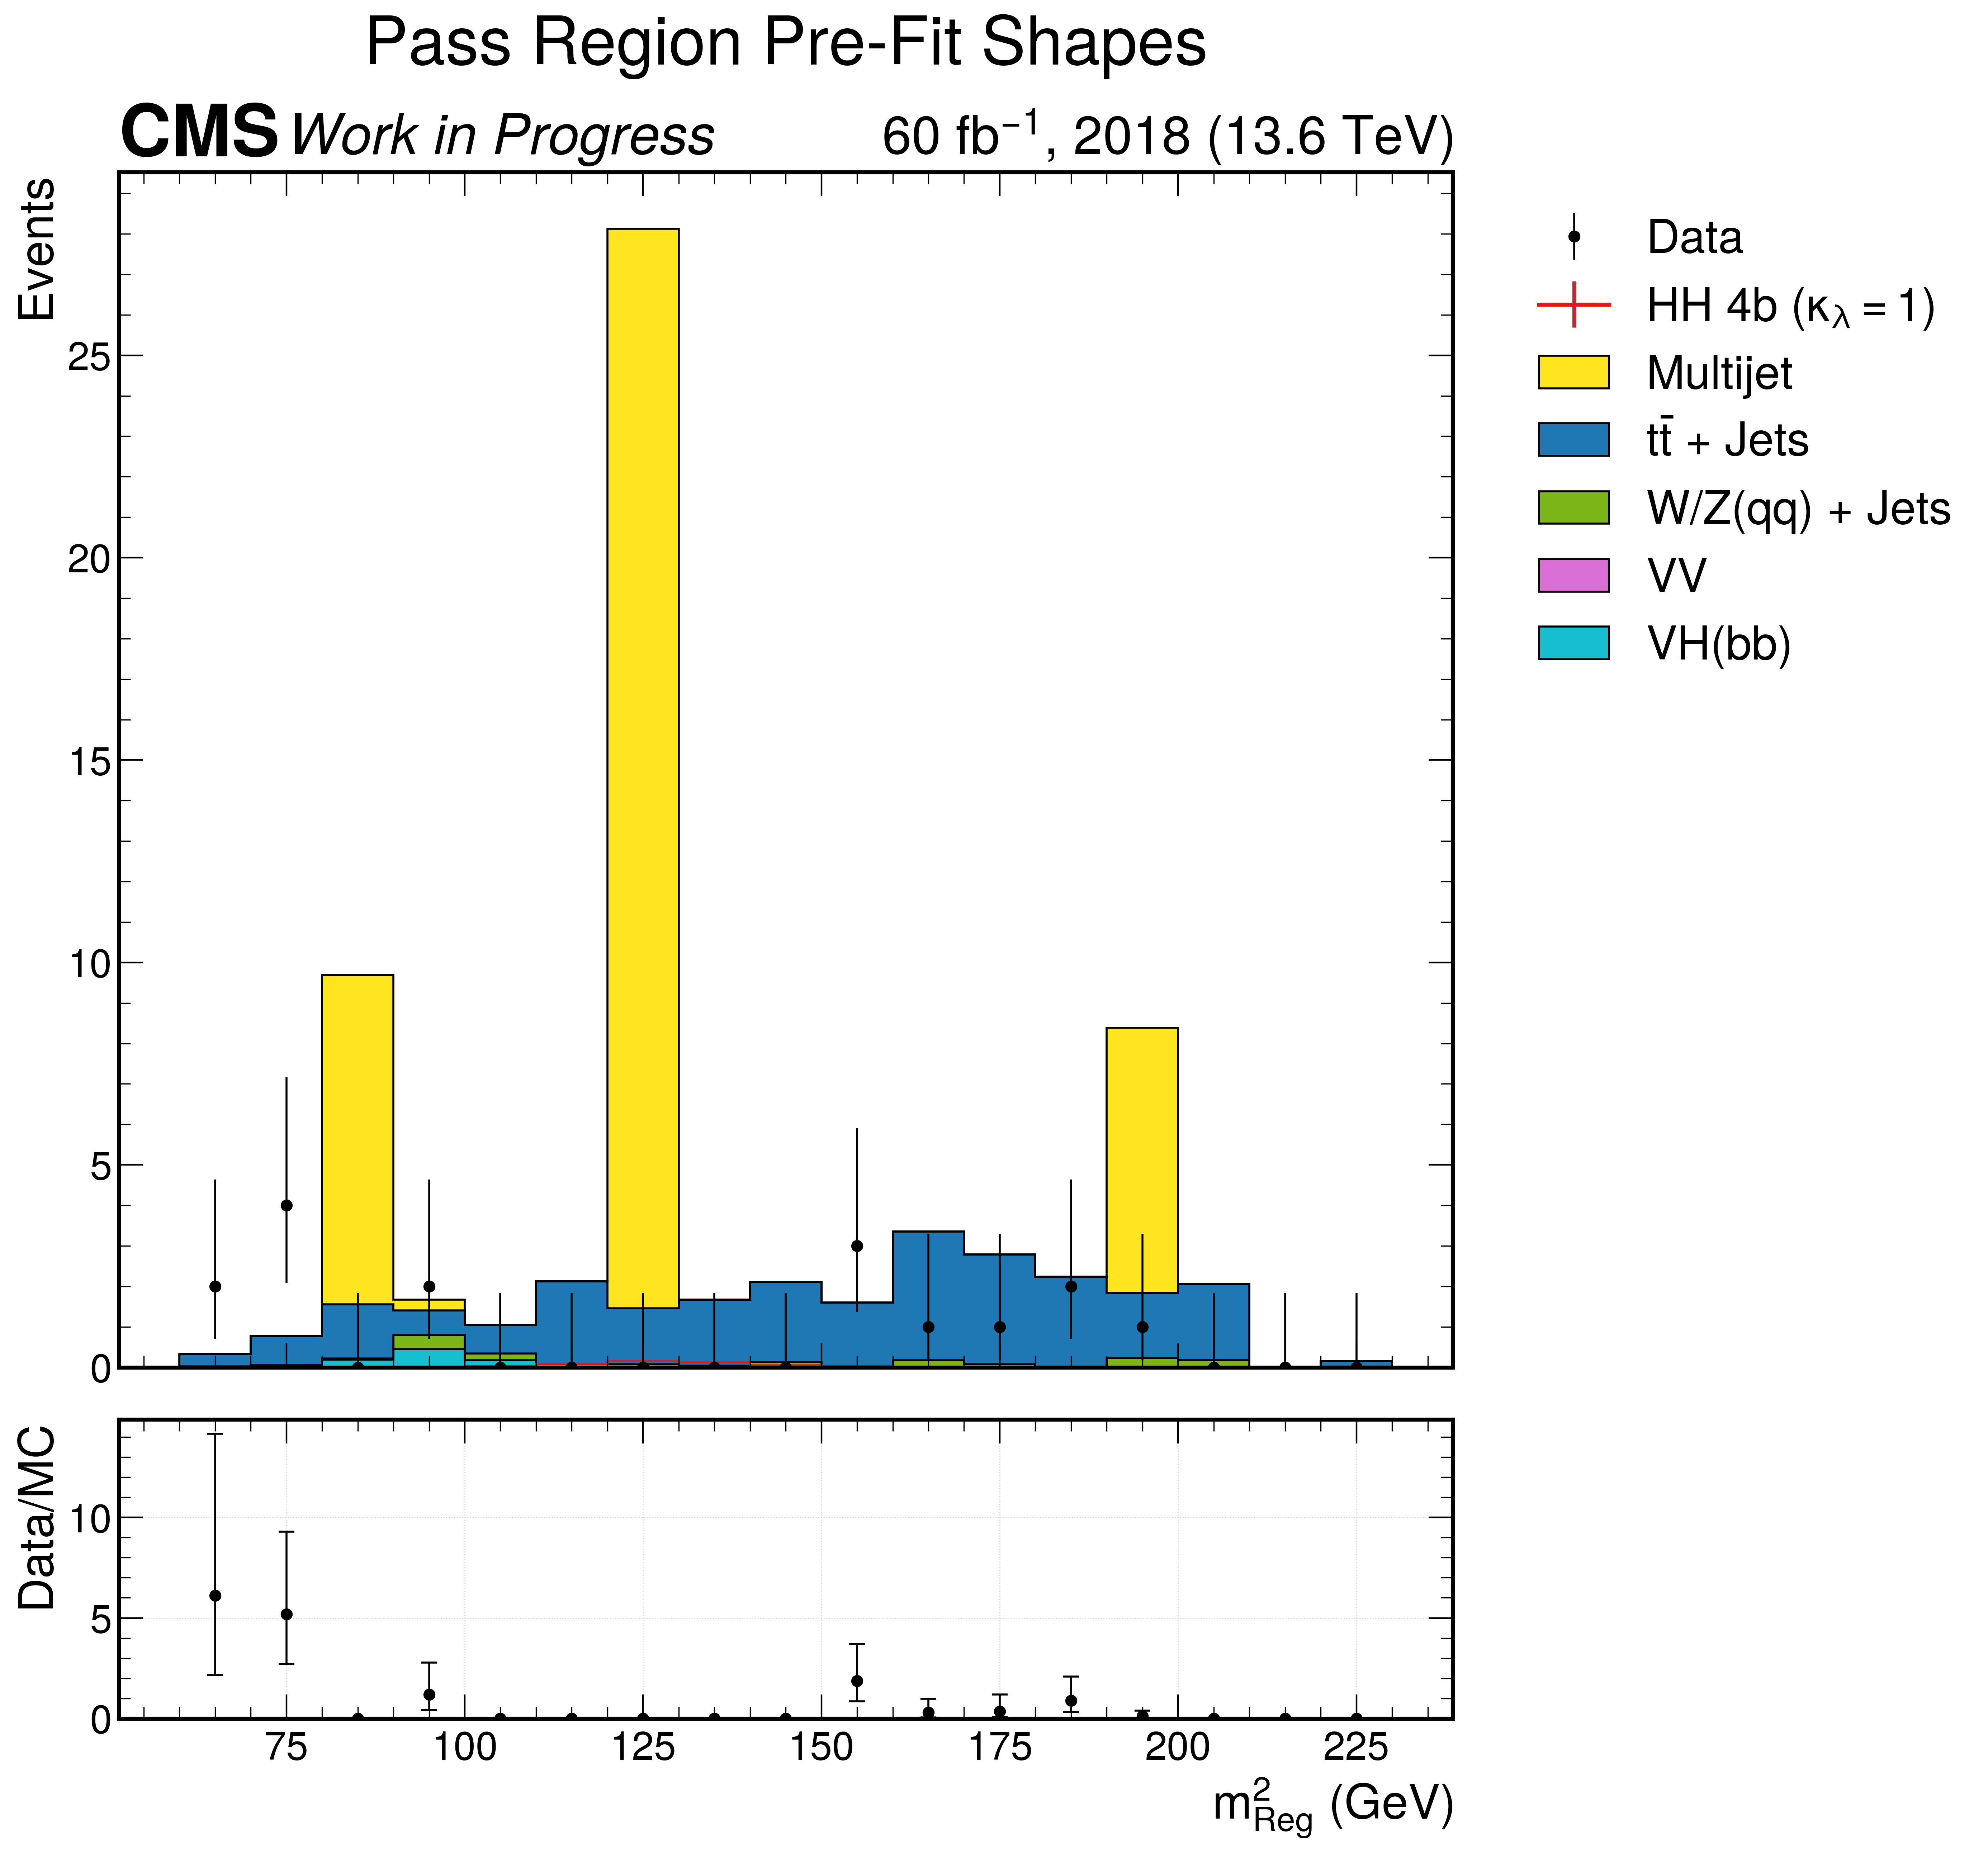

fail
                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 12817  │████████████████████████████████████████████████████████ │
[  60,  70) 0.6806 │                                                         │
[  70,  80) 0.6702 │                                                         │
[  80,  90) 0.6334 │                                                         │
[  90, 100) 0.6445 │                                                         │
[ 100, 110) 0.6054 │                                                         │
[ 110, 120) 0.6187 │                                                         │
[ 120, 130) 0.601  │                                                         │
[ 130, 140) 0.6157 │                                                         │
[ 140, 150) 0.6022 │                                                         │
[ 150, 160) 0.6672 │                                                         │
[ 160, 170) 0.6482 │                           

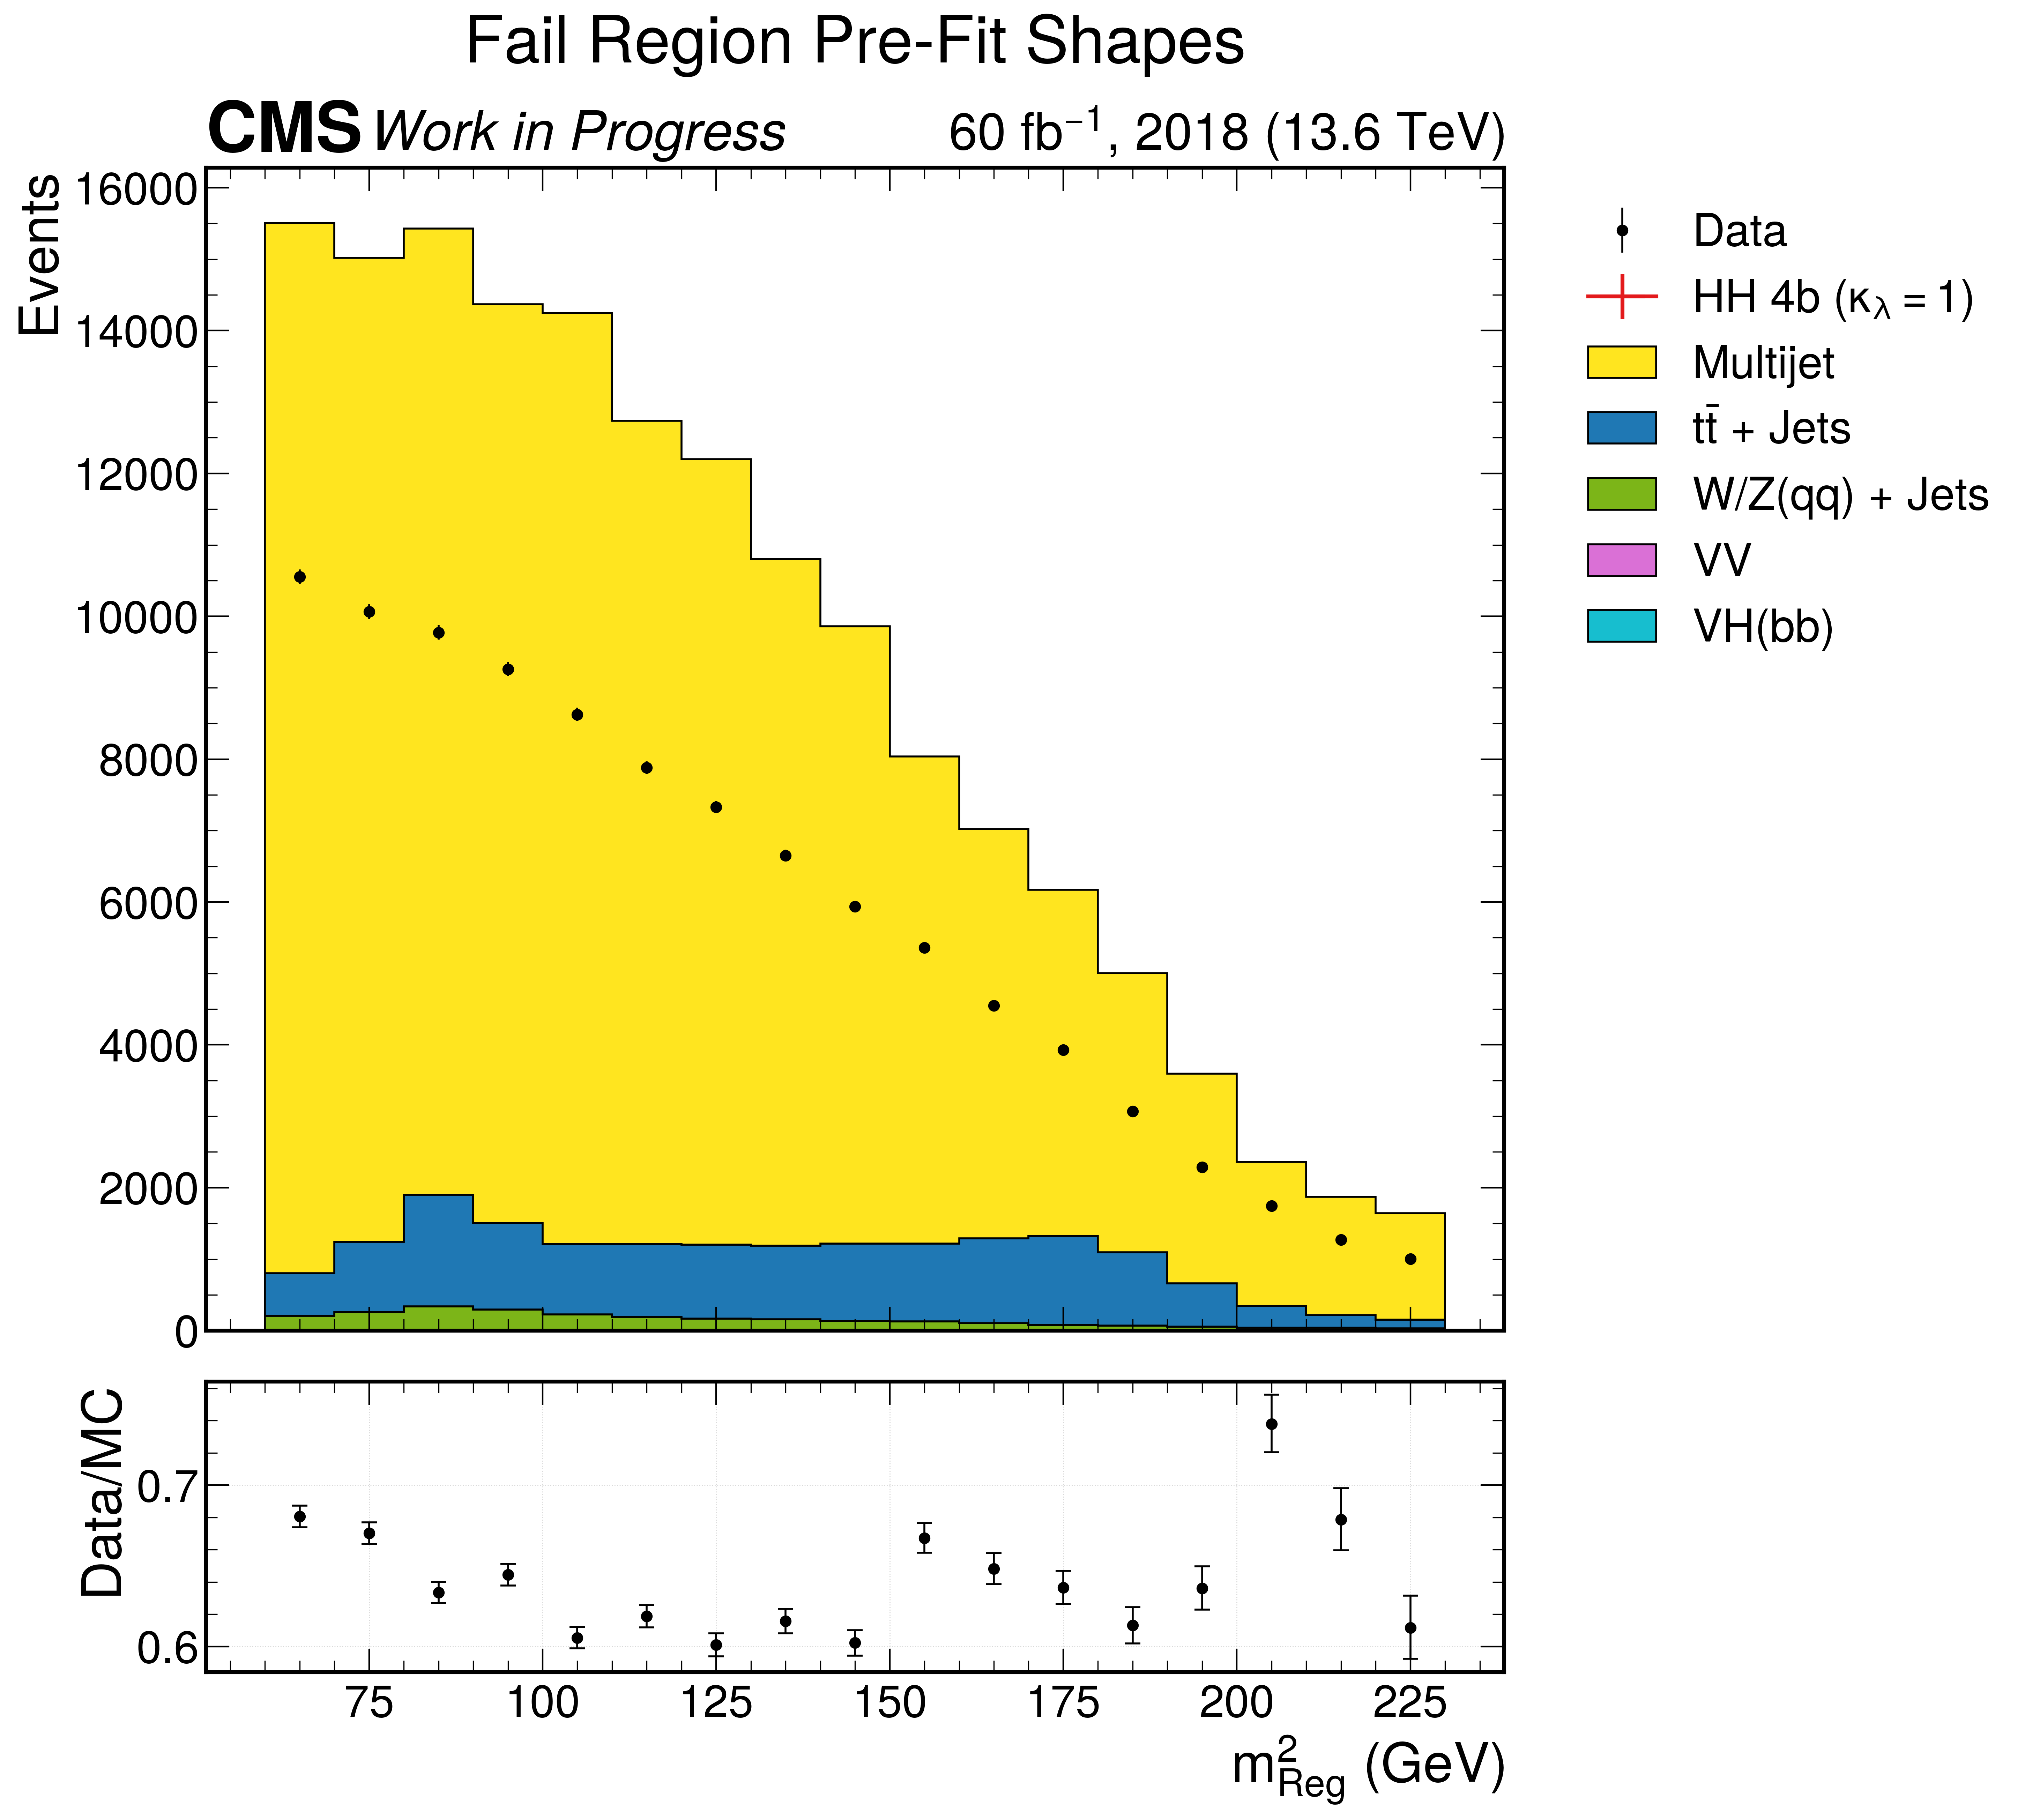

In [16]:
templates = postprocessing.get_templates(
    events_dict,
    bb_masks,
    year,
    sig_keys,
    selection_regions,
    [fit_shape_var],
    {},
    template_dir,
    ["qcd", "ttbar", "vjets", "diboson", "vhtobb"],
    plot_dir,
    cutflow,
    weight_key="weight",
    # weight_shifts=weight_shifts,
    show=True,
)

In [17]:
p = pd.read_csv(f"{template_dir}/cutflows/{year}/pass_cutflow.csv")
p

Unnamed: 0  Preselection  0.985 ≤ bb0FatJetPNetXbb < 1  \
0       hh4b          3.54                          2.59   
1        qcd     893917.93                      94407.49   
2       data     674263.00                      65136.00   
3      ttbar     107194.90                      10580.08   
4      vjets      23115.89                       5079.68   
5    diboson        160.80                         66.32   
6    gghtobb        200.69                        108.22   
7   vbfhtobb         46.25                         27.77   
8     vhtobb         58.71                         32.50   
9    tthtobb        295.08                         67.10   

   0.985 ≤ bb1FatJetPNetXbb < 1  bb0FatJetPt >= 350  bb1FatJetPt >= 310  \
0                          0.78                0.73                0.72   
1                        194.42              180.77              170.47   
2                        180.00              165.00              164.00   
3                        155.81              145.22              142.73   
4                         12.82               12.11               11.98   
5                          1.99                1.87                1.87   
6                          0.27                0.23                0.23   
7                          0.03                0.03                0.03   
8                          3.16                3.01                2.99   
9                          1.79                1.61                1.60   

   105 ≤ bb0FatJetPNetMass < 135  
0                           0.50  
1                          47.90  
2                          31.00  
3                          24.07  
4                           1.45  
5                           0.00  
6                           0.13  
7                           0.03  
8                           1.15  
9                           0.72

In [18]:
1.17/30

0.039

In [19]:
0.31/14

0.02214285714285714

In [20]:
templates

{'pass': Hist(
   StrCategory(['hh4b', 'qcd', 'data', 'ttbar', 'vjets', 'diboson', 'gghtobb', 'vbfhtobb', 'vhtobb', 'tthtobb', 'hh4b_txbb_down', 'hh4b_txbb_up'], name='Sample'),
   Regular(17, 60, 230, name='bb1FatJetPNetMass', label='$m^{2}_\\mathrm{Reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=85.4264, variance=392.267) (WeightedSum(value=93.9494, variance=433.824) with flow),
 'fail': Hist(
   StrCategory(['hh4b', 'qcd', 'data', 'ttbar', 'vjets', 'diboson', 'gghtobb', 'vbfhtobb', 'vhtobb', 'tthtobb'], name='Sample'),
   Regular(17, 60, 230, name='bb1FatJetPNetMass', label='$m^{2}_\\mathrm{Reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=255242, variance=1.4031e+06) (WeightedSum(value=290199, variance=1.58131e+06) with flow)}

In [21]:
postprocessing.save_templates(
    templates,
    f"{template_dir}/{year}_templates.pkl",
    fit_shape_var,
)

Saved templates to templates/23Nov16_2018//2018_templates.pkl


In [22]:
import pickle

with open(f"{template_dir}/{year}_templates.pkl", "rb") as f:
    templates2 = pickle.load(f)

In [23]:
templates2

{'pass': Hist(
   StrCategory(['hh4b', 'qcd', 'data', 'ttbar', 'vjets', 'diboson', 'gghtobb', 'vbfhtobb', 'vhtobb', 'tthtobb', 'hh4b_txbb_down', 'hh4b_txbb_up'], name='Sample'),
   Regular(17, 60, 230, name='bb1FatJetPNetMass', label='$m^{2}_\\mathrm{Reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=85.4264, variance=392.267) (WeightedSum(value=93.9494, variance=433.824) with flow),
 'fail': Hist(
   StrCategory(['hh4b', 'qcd', 'data', 'ttbar', 'vjets', 'diboson', 'gghtobb', 'vbfhtobb', 'vhtobb', 'tthtobb'], name='Sample'),
   Regular(17, 60, 230, name='bb1FatJetPNetMass', label='$m^{2}_\\mathrm{Reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=255242, variance=1.4031e+06) (WeightedSum(value=290199, variance=1.58131e+06) with flow),
 'passMCBlinded': Hist(
   StrCategory(['hh4b', 'qcd', 'data', 'ttbar', 'vjets', 'diboson', 'gghtobb', 'vbfhtobb', 'vhtobb', 'tthtobb', 'hh4b_txbb_down', 'hh4b_txbb_up'], name='Sample'),
   Regular(17, 60, 230, name='bb1FatJetPNetMass'

# BDT-based selection

In [24]:
import vector
import itertools

vector.register_awkward()

def make_vector(events: pd.DataFrame, obj: str):
    """Create a ``vector`` object from the columns of the dataframe"""
    mstring = "PNetMass" if obj == "ak8FatJet" else "Mass"

    return vector.array(
        {
            "pt": events[f"{obj}Pt"],
            "phi": events[f"{obj}Phi"],
            "eta": events[f"{obj}Eta"],
            "M": events[f"{obj}{mstring}"],
        }
    )


In [25]:
# from https://github.com/LPC-HH/HHLooper/blob/master/python/xgboost/append_xgboost_discriminator_to_tree_withSystematics_MC_2018.py
_model_name = f"{MAIN_DIR}/../data/model_xgboost_training_weights_qcd_and_ttbar_Run2_bdt_enhanced_v8p2.pkl"
import pickle
with open(_model_name,'rb') as pkl_file:
    model = pickle.load(pkl_file)
model

/Users/cmantill/miniconda3/envs/coffea/lib/python3.8/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=1, verbosity=2)

In [26]:
variables =   [
    # branche name, BDT name
    ['hh_pt', 'hh_pt', '$p_{T}^{HH}$ (GeV)', 40, 0, 5000],
    ['hh_eta', 'hh_eta', '$\eta^{HH}$', 40, -5.0, 5.0],
    ['hh_mass', 'hh_mass', '$m_{HH}$ (GeV)', 40, 0, 1500],
    ['met', 'met', '$MET$ (GeV)', 60, 0, 600],
    ['fatJet1Tau3OverTau2', 'fatJet1Tau3OverTau2', 'fatJet1Tau3OverTau2', 50,  0.0,  1.0],
    ['fatJet2Tau3OverTau2', 'fatJet2Tau3OverTau2', 'fatJet2Tau3OverTau2', 50,  0.0,  1.0],
    ['fatJet1MassSD', 'j1_mass_sd', '$M_{j1}$ (GeV)', 40,  0.,   5000.],
    ['fatJet1Pt', 'j1_pt', '$p_{T}^{j1}$ (GeV)', 40,  0.,   5000.],
    ['fatJet1Eta', 'j1_eta', '$\eta^{j1}$', 40,  -2.5,  2.5],
    ['fatJet1PNetXbb', 'fatJet1PNetXbb', 'fatJet1PNetXbb', 40,  -100,   100],
    ['fatJet1PNetQCDb', 'fatJet1PNetQCDb', 'fatJet1PNetQCDb', 40,  -100,   100],
    ['fatJet1PNetQCDbb', 'fatJet1PNetQCDbb', 'fatJet1PNetQCDbb', 40,  -100,   100],
    ['fatJet1PNetQCDothers', 'fatJet1PNetQCDothers', 'fatJet1PNetQCDothers', 40,  -100,   100],
    ['fatJet2Pt', 'j2_pt', '$p_{T}^{j2}$ (GeV)', 40,  0.,   500.],
    ['fatJet1PtOverMHH', 'ptj1Omhh', '$p_{T}^{j1}/m_{HH}$', 40,   0.,   1.],
    ['fatJet2PtOverMHH', 'ptj2Omhh', '$p_{T}^{j2}/m_{HH}$', 40,  0.,  0.7],
    ['ptj2_over_ptj1', 'ptj2Optj1', '$p_{T}^{j2}/p_{T}^{j1}$', 40,  0.5,  1.],
]
var_names = [x[0] for x in variables]

def bdt_dataframe(key):
    events = events_dict[key]
    bb_mask = bb_masks[key]
    events_bdt = pd.DataFrame()
    events_bdt["fatJet1Pt"] = utils.get_feat(events, "bb0FatJetPt", bb_mask)
    events_bdt["fatJet1Eta"] = utils.get_feat(events, "bb0FatJetEta", bb_mask)
    events_bdt["fatJet1Phi"] = utils.get_feat(events, "bb0FatJetPhi", bb_mask)
    events_bdt["fatJet1Mass"] = utils.get_feat(events, "bb0FatJetMsd", bb_mask)

    events_bdt["fatJet2Pt"] = utils.get_feat(events, "bb1FatJetPt", bb_mask)
    events_bdt["fatJet2Eta"] = utils.get_feat(events, "bb1FatJetEta", bb_mask)
    events_bdt["fatJet2Phi"] = utils.get_feat(events, "bb1FatJetPhi", bb_mask)
    events_bdt["fatJet2Mass"] = utils.get_feat(events, "bb1FatJetMsd", bb_mask)

    events_bdt["fatJet1PNetXbb"] = utils.get_feat(events, "bb0FatJetPNetXbb", bb_mask)
    #events_bdt["fatJet1PNetQCDb"] = utils.get_feat(events, "bb0FatJetPNetXbb", bb_mask) # FIXME
    #events_bdt["fatJet1PNetQCDbb"] = utils.get_feat(events, "bb0FatJetPNetXbb", bb_mask)  # FIXME
    #events_bdt["fatJet1PNetQCDothers"] = utils.get_feat(events, "bb0FatJetPNetXbb", bb_mask)  # FIXME
    events_bdt["fatJet1PNetQCDb"] = utils.get_feat(events, "bb0FatJetPNetQCDb", bb_mask)
    events_bdt["fatJet1PNetQCDbb"] = utils.get_feat(events, "bb0FatJetPNetQCDbb", bb_mask) 
    events_bdt["fatJet1PNetQCDothers"] = utils.get_feat(events, "bb0FatJetPNetQCDothers", bb_mask)

    events_bdt["fatJet1MassSD"] = utils.get_feat(events, "bb0FatJetMsd", bb_mask)

    h1 = make_vector(events_bdt, "fatJet1")
    h2 = make_vector(events_bdt, "fatJet2")
    hh = h1 + h2
    events_bdt["hh_pt"] = hh.pt
    events_bdt["hh_eta"] = hh.eta
    events_bdt["hh_mass"] = hh.mass

    #events_bdt["met"]= utils.get_feat(events, "ht") # FIXME
    #events_bdt["fatJet1Tau3OverTau2"] = utils.get_feat(events, "bb0FatJetPNetXjj", bb_mask) # FIXME
    #events_bdt["fatJet2Tau3OverTau2"] = utils.get_feat(events, "bb1FatJetPNetXjj", bb_mask) # FIXME
    events_bdt["met"]= utils.get_feat(events, "MET_pt")
    events_bdt["fatJet1Tau3OverTau2"] = utils.get_feat(events, "bb0FatJetTau3OverTau2", bb_mask)
    events_bdt["fatJet2Tau3OverTau2"] = utils.get_feat(events, "bb1FatJetTau3OverTau2", bb_mask)
    events_bdt["fatJet1PtOverMHH"] = events_bdt["fatJet1Pt"] / (hh.mass)
    events_bdt["fatJet2PtOverMHH"] = events_bdt["fatJet2Pt"] / (hh.mass)
    events_bdt["ptj2_over_ptj1"] = events_bdt["fatJet2Pt"] / events_bdt["fatJet1Pt"]

    events_bdt = events_bdt[var_names]
    # getting a numpy array from two pandas data frames
    x_test = events_bdt.values
    #creating numpy array for target variables
    y_test = np.zeros(len(events_bdt))
    # predict
    y_pred = model.predict_proba(x_test)[:, 1]

    events_bdt["bdt_prediction"] = y_pred

    events_bdt["fatJet1PNetMass"] = utils.get_feat(events, "bb0FatJetPNetMass", bb_mask)
    events_bdt["fatJet2PNetMass"] = utils.get_feat(events, "bb1FatJetPNetMass", bb_mask)
    events_bdt["weight"] = utils.get_feat(events, "weight")    
    events_bdt["fatJet2PNetXbb"] = utils.get_feat(events, "bb1FatJetPNetXbb", bb_mask)

    return events_bdt

In [27]:
events_bdt_dict = {}
for key in ["hh4b", "qcd", "ttbar", "vjets", "diboson", "vhtobb", "data"]:
    print(key)
    events_bdt_dict[key] = bdt_dataframe(key)

hh4b
qcd
ttbar
vjets
diboson
vhtobb
data


In [28]:
print(len(events_bdt_dict["qcd"]["weight"]))
print(len(events_dict["qcd"]["weight"]))


200547
200547


pass
                    ┌────────────────────────────────────────────────────────┐
[-inf,  60) 2       │███████████████████████▉                                │
[  60,  70) 2.351   │████████████████████████████                            │
[  70,  80) 0.2916  │███▌                                                    │
[  80,  90) 0.09554 │█▏                                                      │
[  90, 100) 1.042   │████████████▍                                           │
[ 100, 110) 0       │                                                        │
[ 110, 120) 0       │                                                        │
[ 120, 130) 0       │                                                        │
[ 130, 140) 0       │                                                        │
[ 140, 150) 0       │                                                        │
[ 150, 160) 0.4197  │█████                                                   │
[ 160, 170) 0       │                          

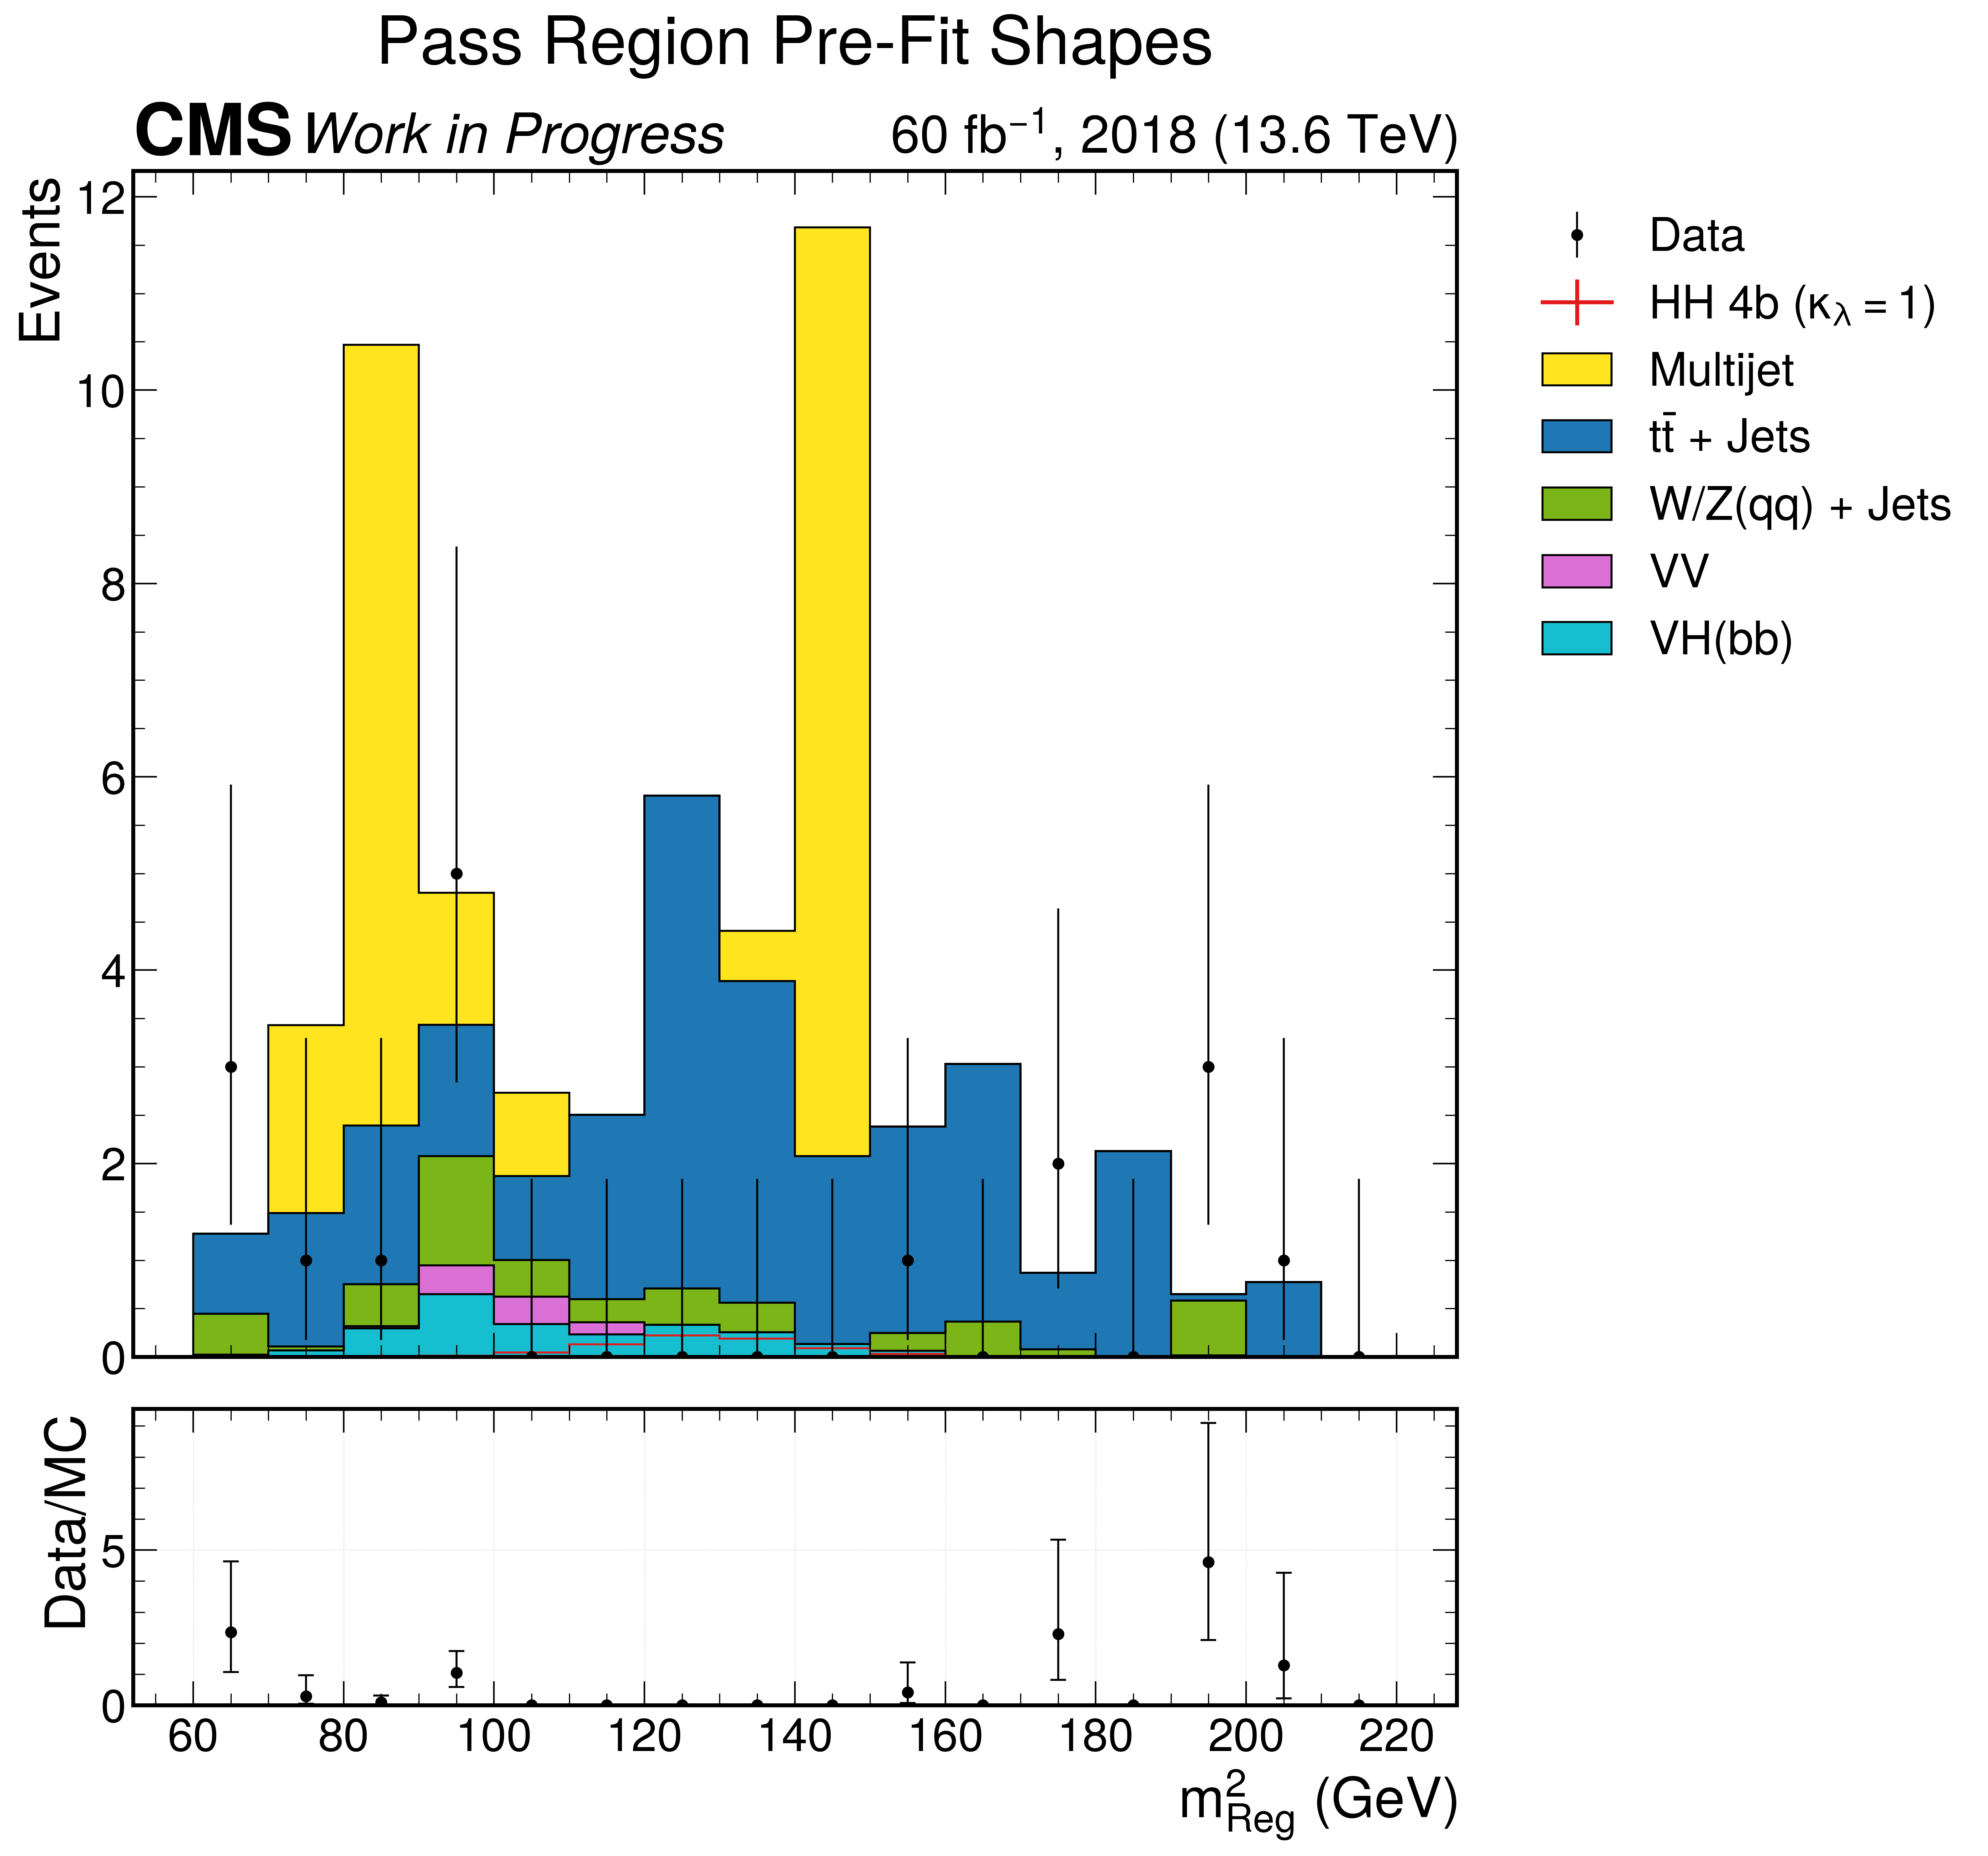

fail
                   ┌─────────────────────────────────────────────────────────┐
[-inf,  60) 4282   │████████████████████████████████████████████████████████ │
[  60,  70) 0.5863 │                                                         │
[  70,  80) 0.571  │                                                         │
[  80,  90) 0.5736 │                                                         │
[  90, 100) 0.556  │                                                         │
[ 100, 110) 0.5294 │                                                         │
[ 110, 120) 0.5688 │                                                         │
[ 120, 130) 0.5978 │                                                         │
[ 130, 140) 0.5334 │                                                         │
[ 140, 150) 0.5387 │                                                         │
[ 150, 160) 0.5659 │                                                         │
[ 160, 170) 0.6288 │                           

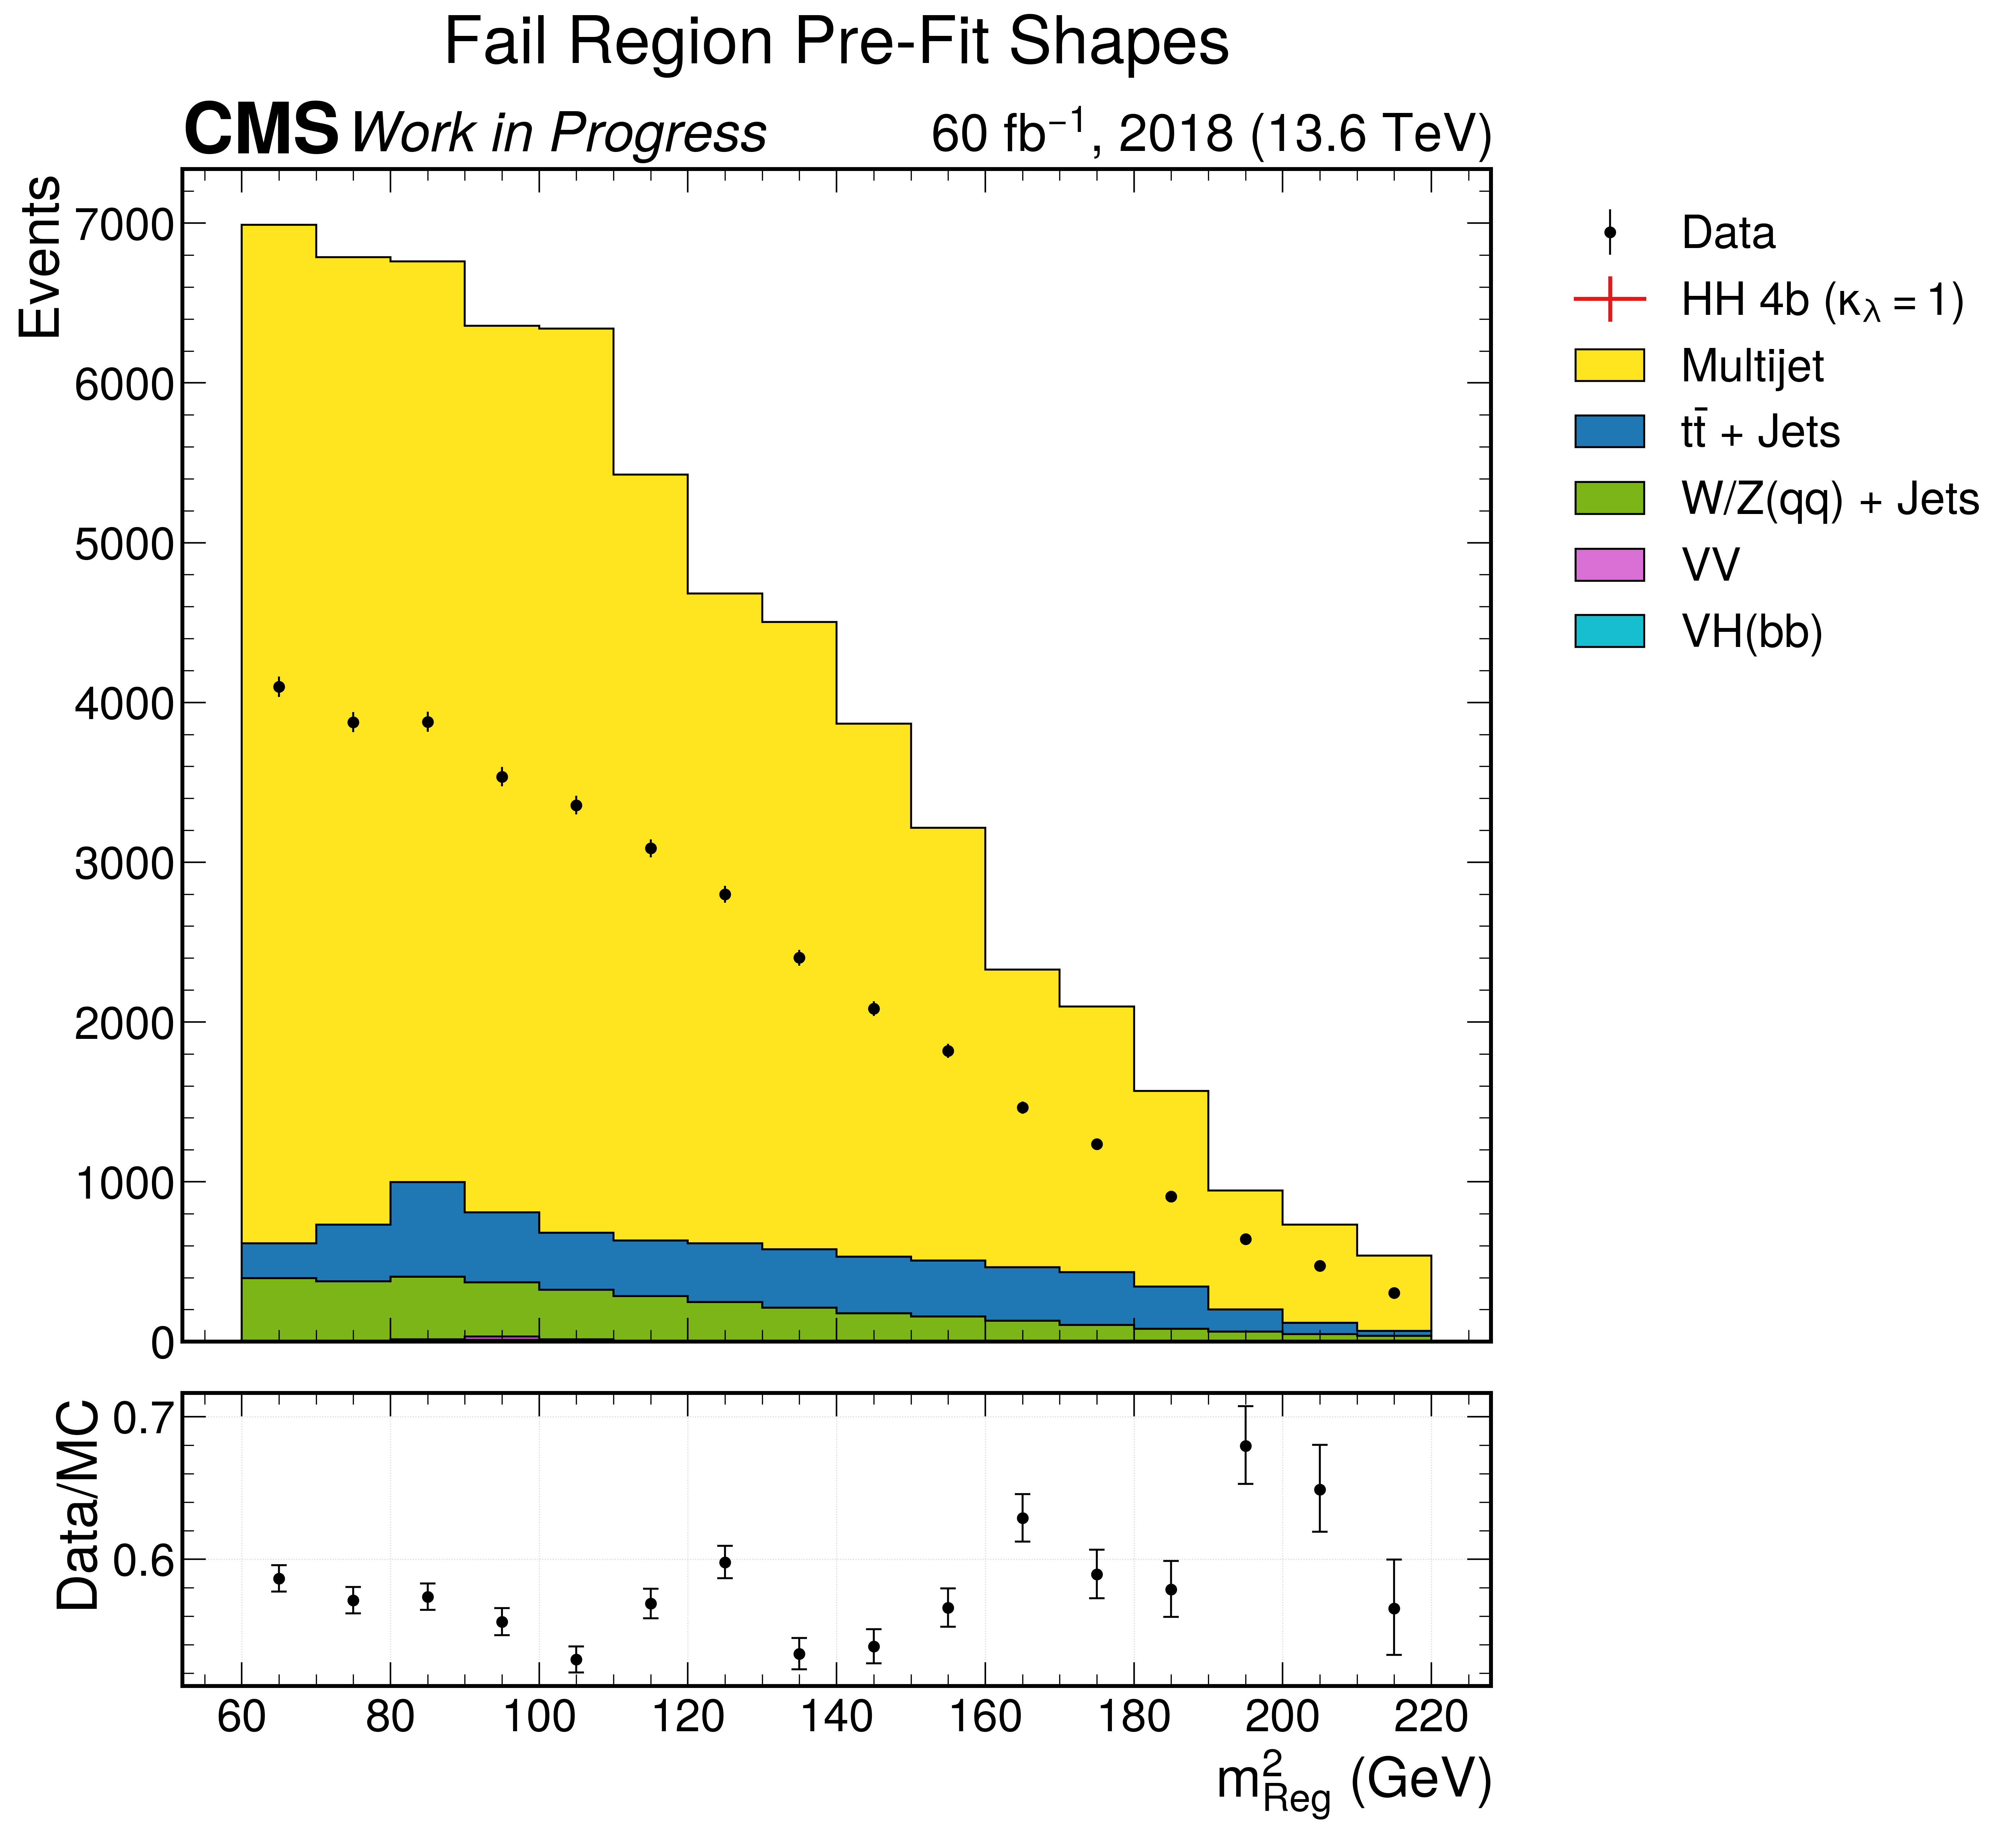

In [29]:
selection_regions = {
    # category 1
    "pass": Region(
        cuts={
            "fatJet1PNetXbb": [0.8, CUT_MAX_VAL],
            "fatJet2PNetXbb": [0.980, CUT_MAX_VAL],
            "fatJet1Pt": [300, CUT_MAX_VAL],
            "fatJet2Pt": [300, CUT_MAX_VAL],
            "fatJet1MassSD": [50, CUT_MAX_VAL],
            "fatJet2PNetMass": [50, CUT_MAX_VAL],
            "bdt_prediction": [0.43, CUT_MAX_VAL],
        },
        label="Pass",
    ),
    "fail": Region(
        cuts={
            "fatJet2PNetXbb": [0., 0.950],
            "fatJet1Pt": [300, CUT_MAX_VAL],
            "fatJet2Pt": [300, CUT_MAX_VAL],
            "fatJet1MassSD": [50, CUT_MAX_VAL],
            "fatJet2PNetMass": [50, CUT_MAX_VAL],
            "bdt_prediction": [0.03, CUT_MAX_VAL],
        },
        label="Fail",
    ),
}

fit_shape_var = ShapeVar(
    "fatJet2PNetMass",
    r"$m^{2}_\mathrm{Reg}$ (GeV)",
    #[19, 60, 250],
    [17, 50, 220],
    reg=True,
    blind_window=[100, 150],
)

template_dir = f"templates/{date}_bdt/"
plot_dir = f"{plot_dir}_bdt"
_ = os.system(f"mkdir -p {plot_dir}")
_ = os.system(f"mkdir -p {template_dir}/cutflows/{year}")

templates = postprocessing.get_templates(
    events_bdt_dict,
    bb_masks,
    year,
    sig_keys,
    selection_regions,
    [fit_shape_var],
    {},
    template_dir,
    ["qcd", "ttbar", "vjets", "diboson", "vhtobb"],
    plot_dir,
    cutflow,
    weight_key="weight",
    # weight_shifts=weight_shifts,
    show=True,
)

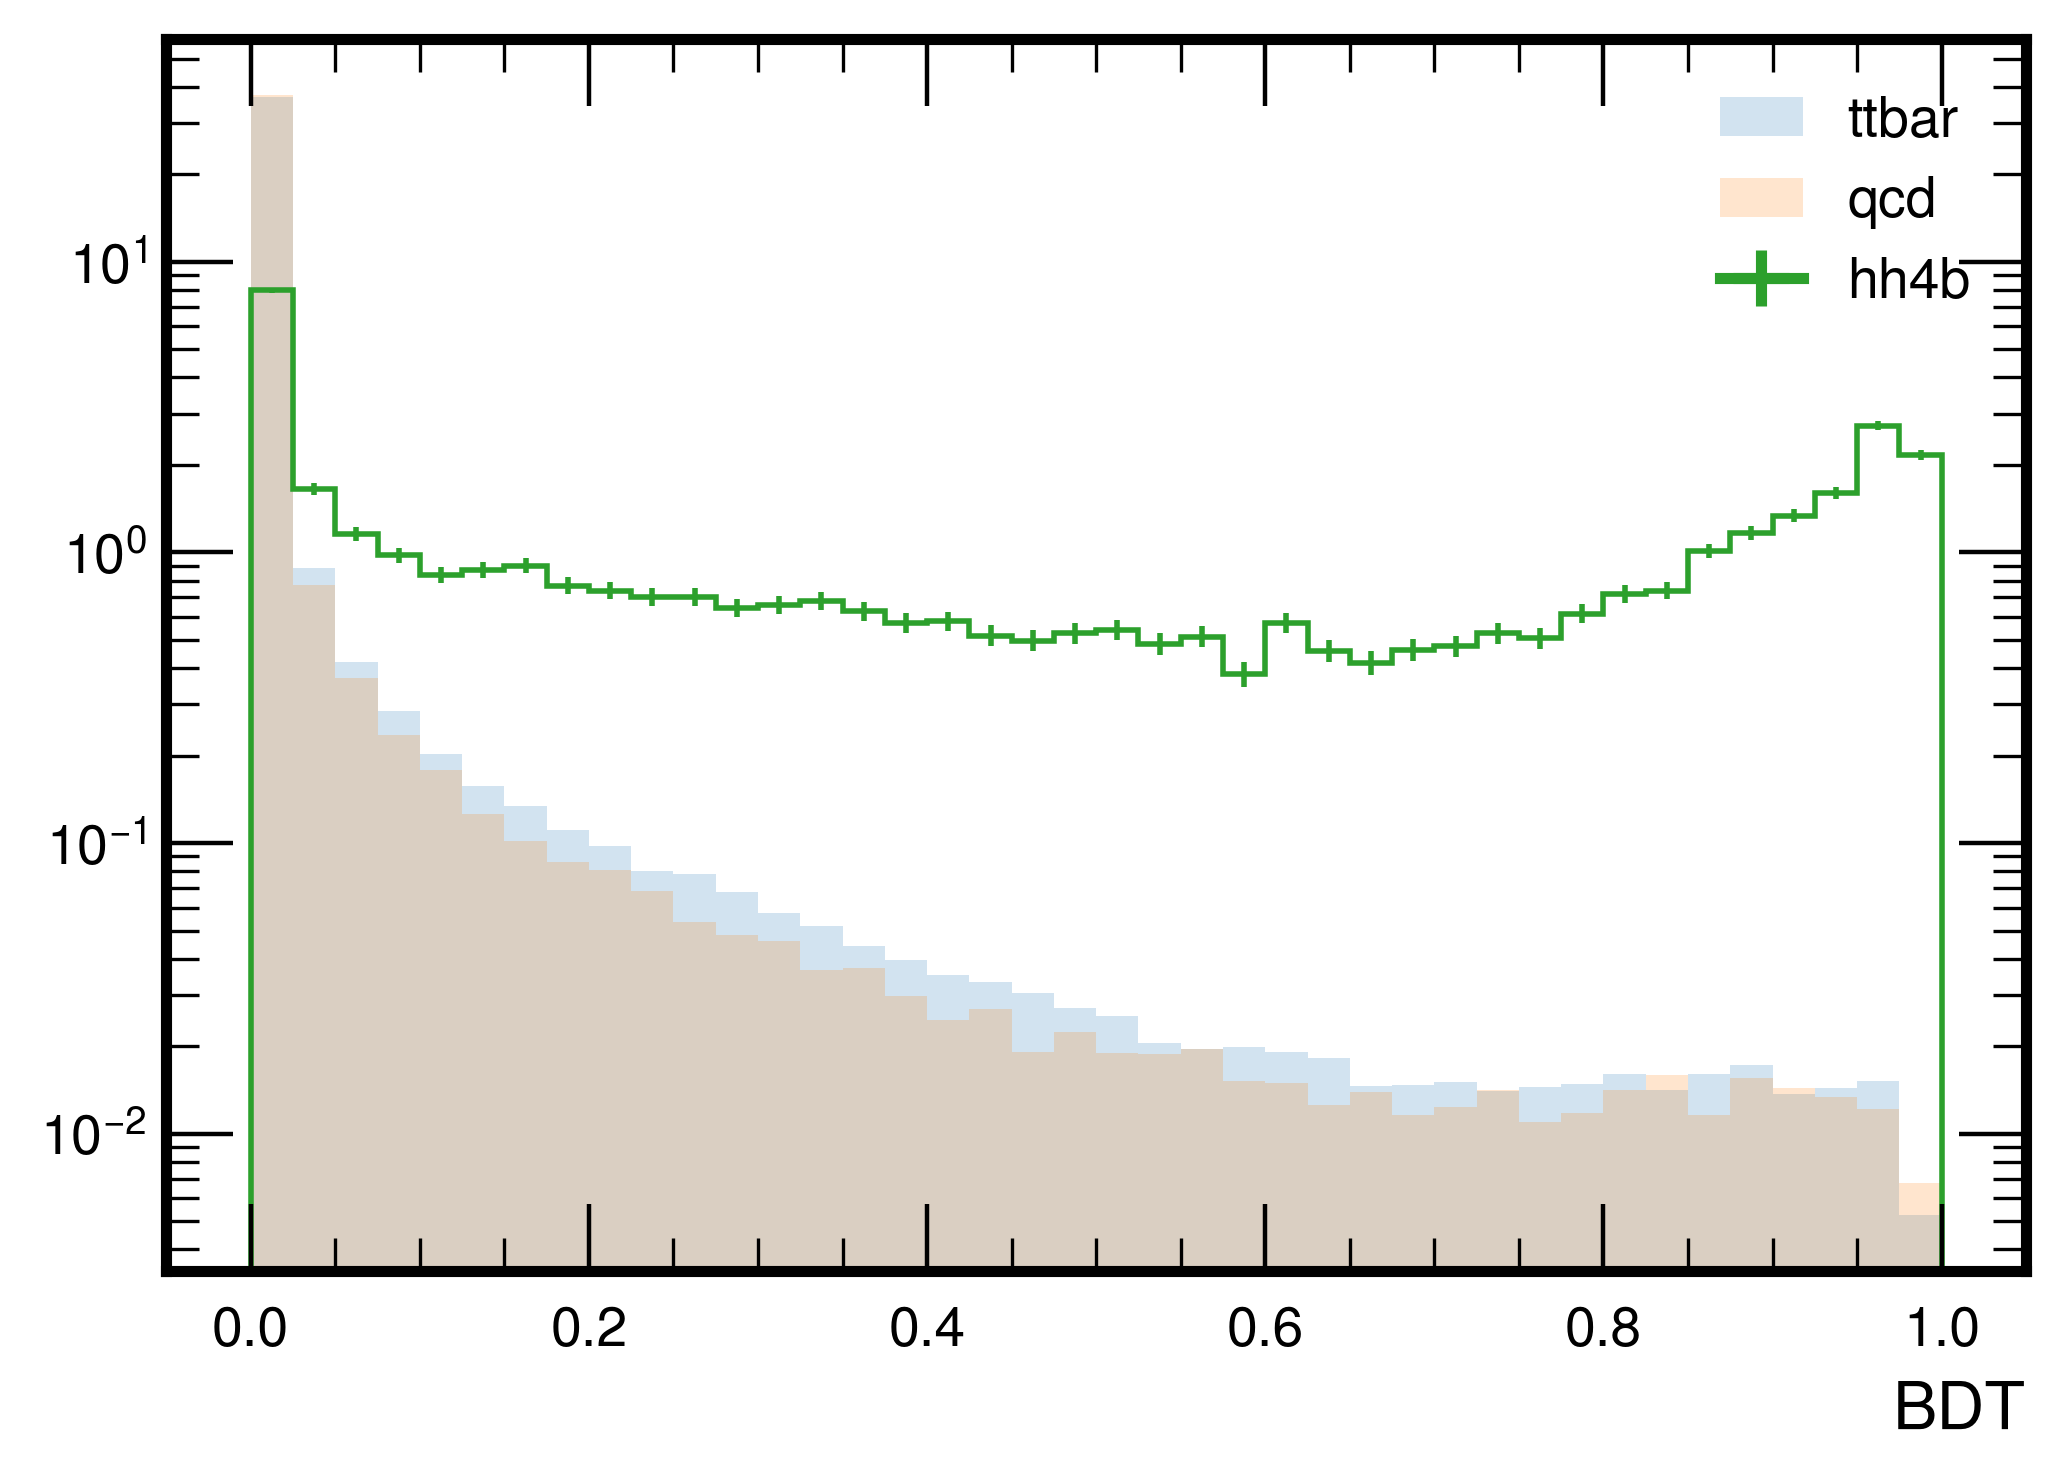

In [30]:
import hist
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker

hep.style.use(["CMS", "firamath"])

formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))
plt.rcParams.update({"font.size": 12})
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["grid.color"] = "#CCCCCC"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.edgecolor"] = "none"

bdt_axis = hist.axis.Regular(40, 0, 1, name="bdt", label=r"BDT")
cat_axis = hist.axis.StrCategory([], name="cat", growth=True)

h = hist.Hist(bdt_axis, cat_axis)

keys = ["ttbar", "qcd", "hh4b"]
for key in keys:
    h.fill(bdt=events_bdt_dict[key]["bdt_prediction"].to_numpy(), cat=key)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for key in ["ttbar", "qcd"]:
    hep.histplot(
        h[{"cat": key}],
        ax=ax,
        label=key,
        histtype="fill",
        alpha=0.2,
        linewidth=1,
        density=True,
    )
hep.histplot(
    h[{"cat": "hh4b"}],
    ax=ax,
    label="hh4b",
    histtype="step",
    linewidth=1,
    density=True,
)
ax.set_yscale('log')
ax.legend()



/var/folders/np/80b736zs2753ch8xq6lq33d80000gq/T/ipykernel_14750/3162896417.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  weights = np.concatenate(np.array(weights), axis=0)


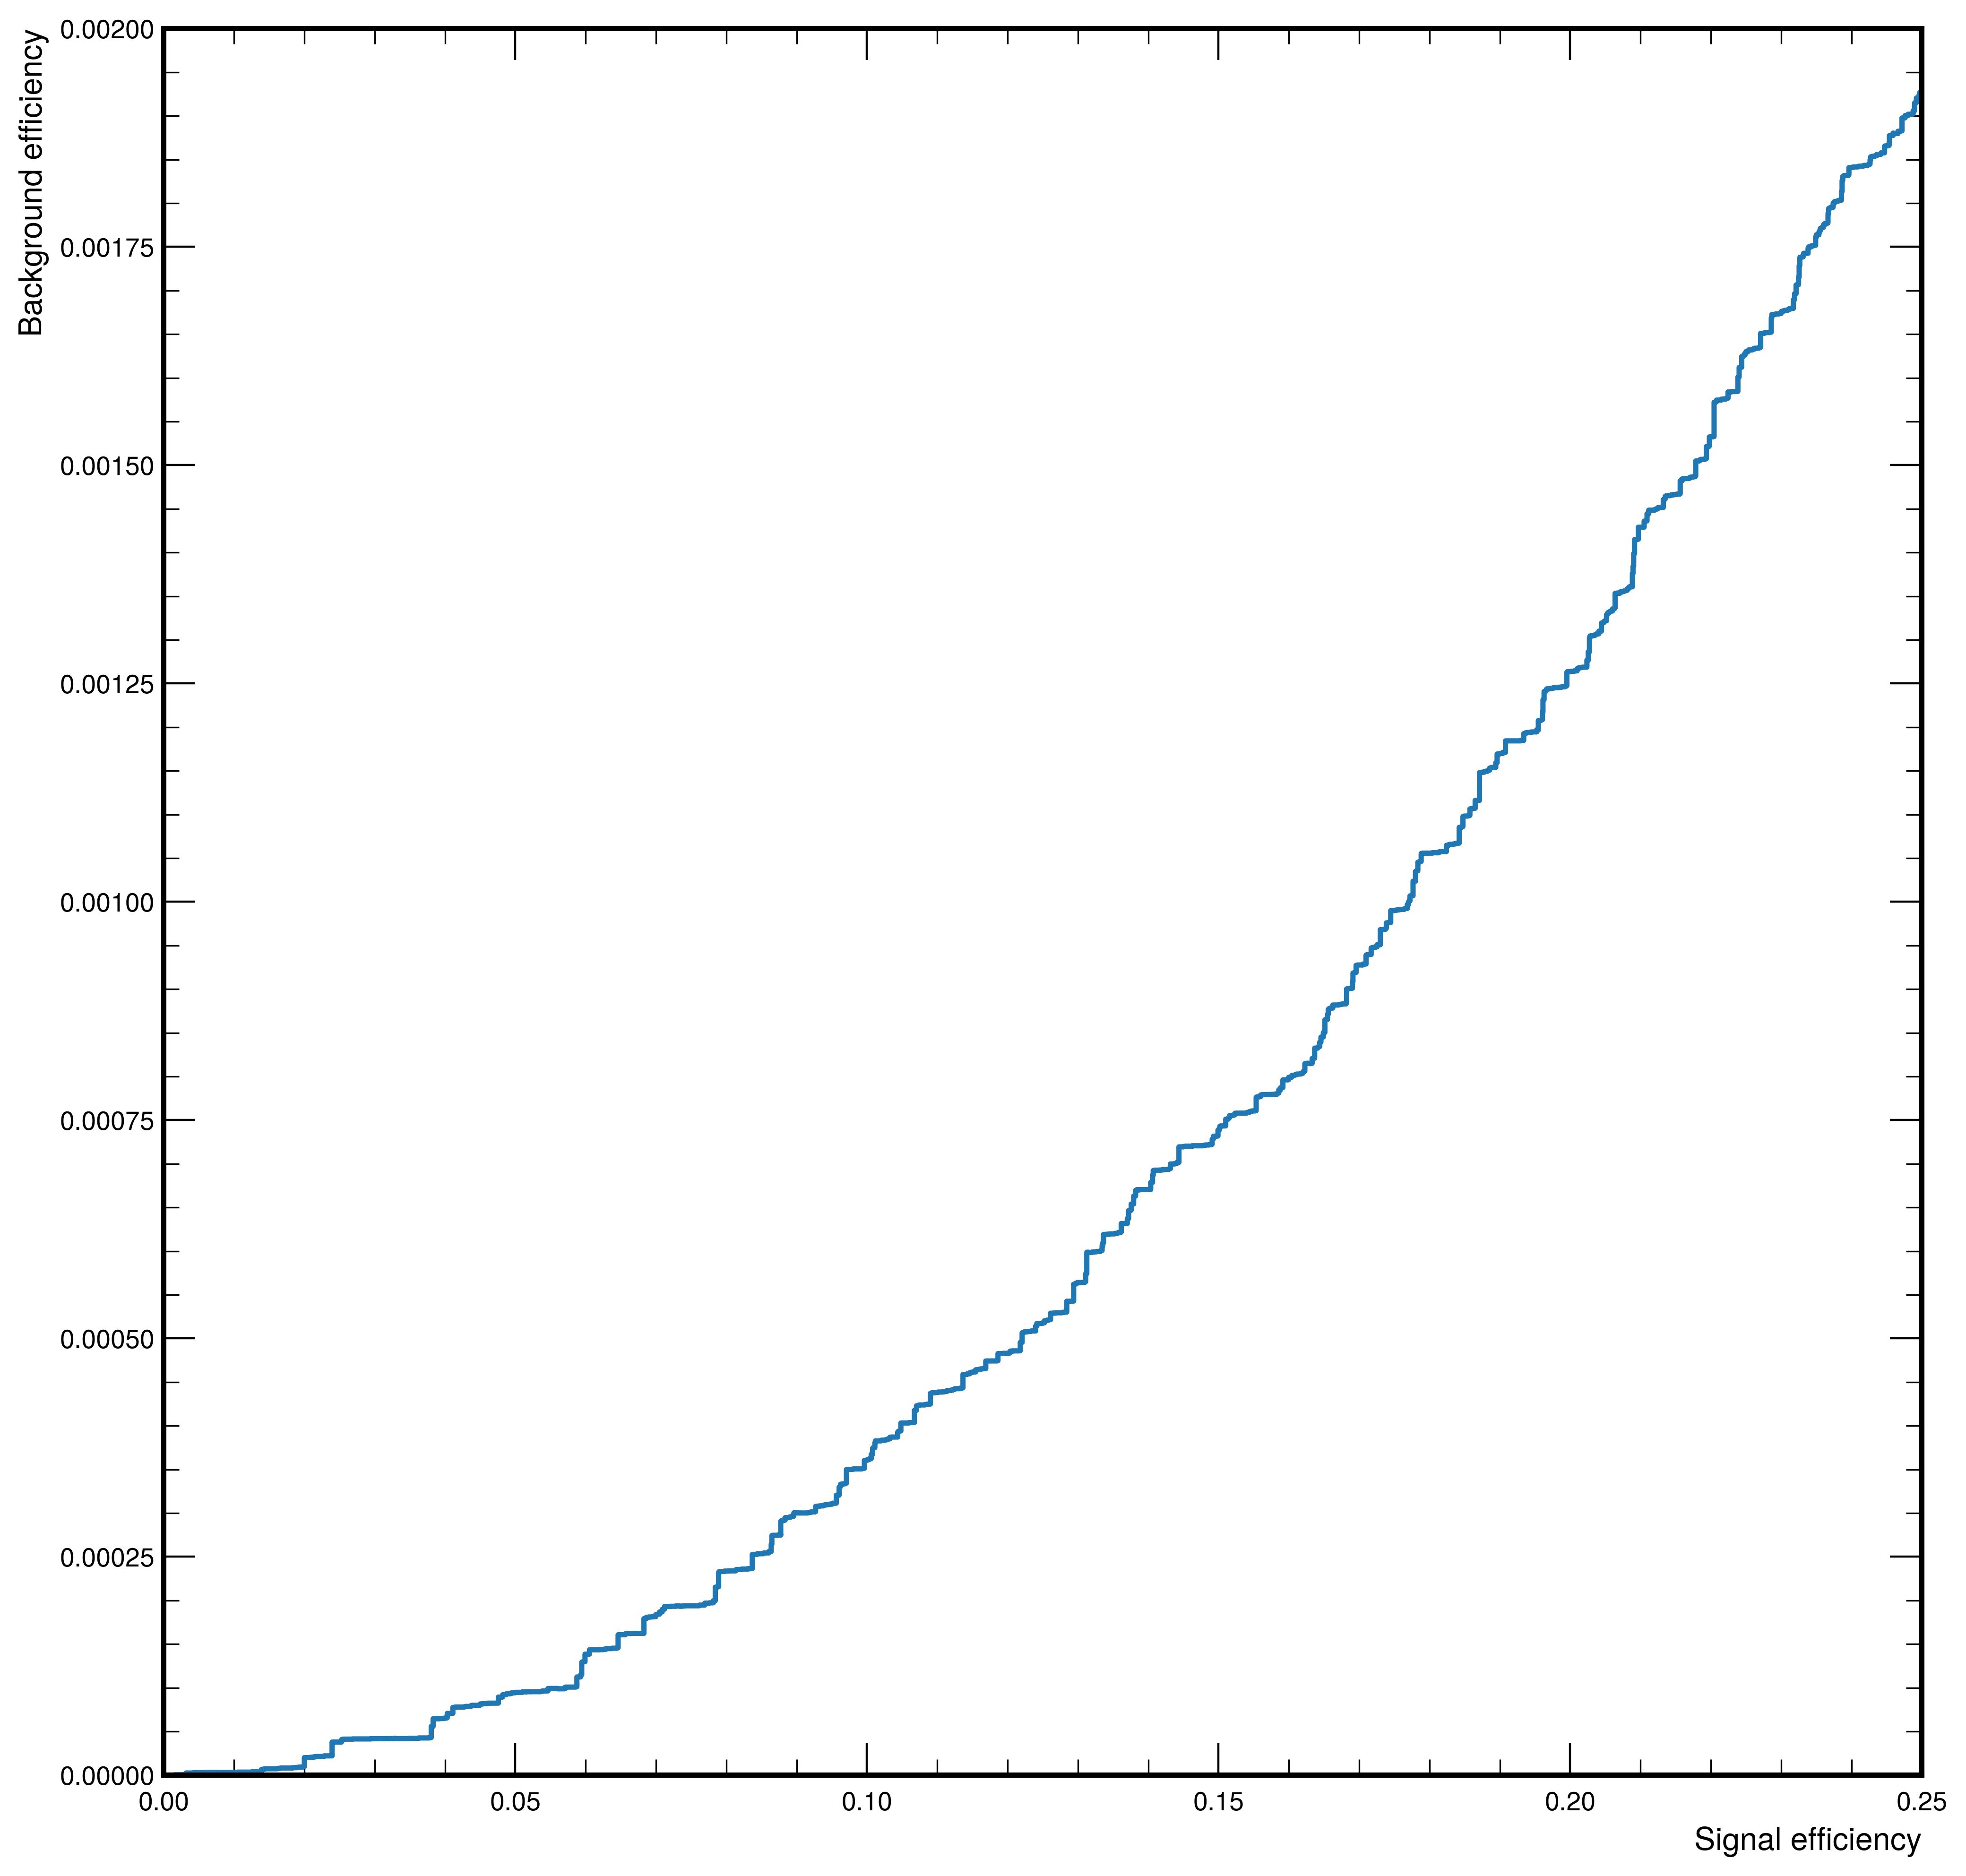

In [31]:
sig_jets_score = events_bdt_dict["hh4b"]["bdt_prediction"].values
sig_jets_score.shape

bg_jets_score = np.concatenate(
    [events_bdt_dict["ttbar"]["bdt_prediction"].values,
     events_bdt_dict["qcd"]["bdt_prediction"].values,
    ]
)
bg_jets_score.shape

sig_key = "hh4b"
bg_keys = ["qcd", "ttbar"] 

y_true = np.concatenate(
    [
        np.ones(len(sig_jets_score)),
        np.zeros(len(bg_jets_score)),
    ]
)

weights = []
for key in ["qcd", "ttbar", "hh4b"]:
    weights.append(events_bdt_dict[key]["weight"].values)
weights = np.concatenate(np.array(weights), axis=0)

scores = np.concatenate((sig_jets_score, bg_jets_score))

fpr, tpr, thresholds = roc_curve(y_true, scores, sample_weight=weights)

plt.figure(figsize=(12, 12))
plt.plot(
    tpr,
    fpr,
    linewidth=2,
)
plt.xlabel("Signal efficiency")
plt.ylabel("Background efficiency")
plt.xlim([0, 0.25])
plt.ylim([0, 0.002])
plt.legend(loc="upper left")
